In [1]:
#all packages and dataframes
import numpy as np
import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
%matplotlib inline 
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/results/acc/'
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
Parcel_params = classification.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
taskList=['mem','glass','semantic','motor']
subDir = thisDir + 'output/results/subNetwork/'
randDir=thisDir + 'output/results/rdmNetwork/'
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)

#Same Task (Fig 1)
pairCV=pd.read_csv(outDir+'CV/acc.csv', usecols=[0,1,2])
t_DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[0,1,2,3])
pairDS=pd.DataFrame()
for task in taskList:
    tmp=t_DS[(t_DS['task']==task)]
    tmp_mu=tmp.groupby(['train_sub']).mean()
    tmp_mu['task']=task
    pairDS=pd.concat([pairDS,tmp_mu])
pairDS.reset_index(inplace=True)
pairDS.rename(columns={'train_sub':'sub'},inplace=True)
pairDS['Analysis']='Different'
pairCV['Analysis']='Same'
pair_res=pd.concat([pairDS, pairCV])
#motor
pair_motor=pair_res[pair_res.task=='motor']
#mixed
pair_glass=pair_res[pair_res.task=='glass']
pair_sem=pair_res[pair_res.task=='semantic']
#memory
pair_mem=pair_res[pair_res.task=='mem']



#Different task (Fig 2)
SS_diff=pd.read_csv(outDir+'SS/stats.csv', usecols=[0,1,2,3])
SS_diff['analysis']='Same Person'
BS_diff=pd.read_csv(outDir+'BS/stats.csv', usecols=[0,1,2,3,4])
BS_diff['analysis']='Different Person'
diff_res=pd.concat([SS_diff, BS_diff])
#motor
diff_motor=diff_res[diff_res.train_task=='motor']
#mixed
diff_glass=diff_res[diff_res.train_task=='glass']
diff_sem=diff_res[diff_res.train_task=='semantic']
#memory
diff_mem=diff_res[diff_res.train_task=='mem']

#Make color palette
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)

#adding thinner lines to different task analysis figure
t_SS=pd.read_csv(outDir+'SS/acc.csv',usecols=[0,1,2,3])
t_BS=pd.read_csv(outDir+'BS/acc.csv',usecols=[0,1,2,3,4])

pairBS=pd.DataFrame()
for task in taskList:
    for test_task in taskList:
        if task==test_task:
            continue
        else:
            tmp=t_BS[(t_BS.train_task==task)&(t_BS.test_task==test_task)]
            tmp_mu=tmp.groupby(['train_sub']).mean()
            tmp_mu['train_task']=task
            tmp_mu['test_task']=test_task
            pairBS=pd.concat([pairBS,tmp_mu])
pairBS.reset_index(inplace=True)
pairBS.rename(columns={'train_sub':'sub'},inplace=True)
pairBS['Analysis']='Different Person'


t_SS['Analysis']='Same Person'
DT_sep=pd.concat([pairBS, t_SS])

#motor
DT_motor=DT_sep[DT_sep.train_task=='motor']
DT_motor_sem=DT_motor[DT_motor.test_task=='semantic']
DT_motor_mem=DT_motor[DT_motor.test_task=='mem']
DT_motor_glass=DT_motor[DT_motor.test_task=='glass']
#glass
DT_glass=DT_sep[DT_sep.train_task=='glass']
DT_glass_sem=DT_glass[DT_glass.test_task=='semantic']
DT_glass_mot=DT_glass[DT_glass.test_task=='motor']
DT_glass_mem=DT_glass[DT_glass.test_task=='mem']
#semantic
DT_sem=DT_sep[DT_sep.train_task=='semantic']
DT_sem_glass=DT_sem[DT_sem.test_task=='glass']
DT_sem_mot=DT_sem[DT_sem.test_task=='motor']
DT_sem_mem=DT_sem[DT_sem.test_task=='mem']
#memory
DT_mem=DT_sep[DT_sep.train_task=='mem']
DT_mem_sem=DT_mem[DT_mem.test_task=='semantic']
DT_mem_mot=DT_mem[DT_mem.test_task=='motor']
DT_mem_glass=DT_mem[DT_mem.test_task=='glass']

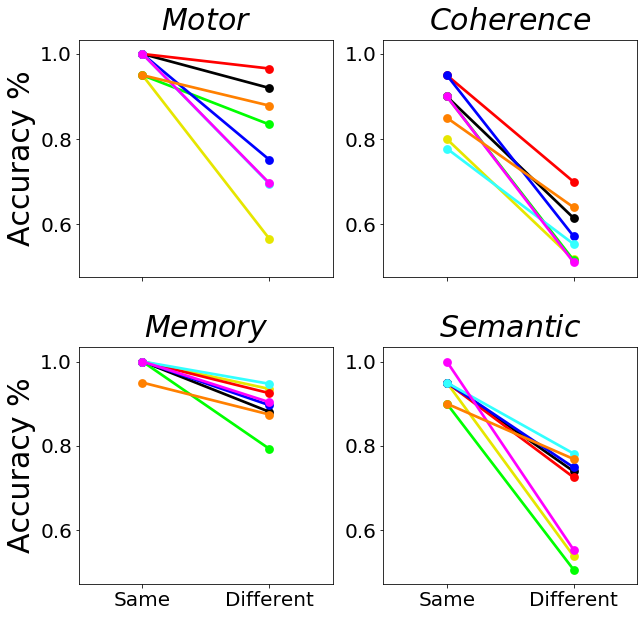

In [256]:
#Same Task (Fig 1)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
"""
fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
#motor
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Same','Different'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=30, pad=10)
plt.xlabel('')
plt.ylabel('Accuracy %',fontsize=30)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=20)
#mixed
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_glass, ax=ax2, order=['Same','Different'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=30, pad=10)
plt.ylabel('')
plt.xlabel('')
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=20)
#memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Same','Different'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=30, pad=10)
plt.ylabel('Accuracy %',fontsize=30)
plt.xlabel(' ')#,fontsize=15)
ax.tick_params(labelsize=20)
ax4=fig.add_subplot(gs[1,1],sharey=ax3)

ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax4, order=['Same','Different'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
#plt.legend(bbox_to_anchor=(1.6, 2.3),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=30, pad=10)
plt.ylabel('')
plt.xlabel(' ')#,fontsize=15)
ax.tick_params(labelsize=20)
plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/CVDS_point_plots.png', bbox_inches='tight')

#plt.savefig(thisDir+'output/FigsFinal/CVDS_point_plots.png', bbox_inches='tight')


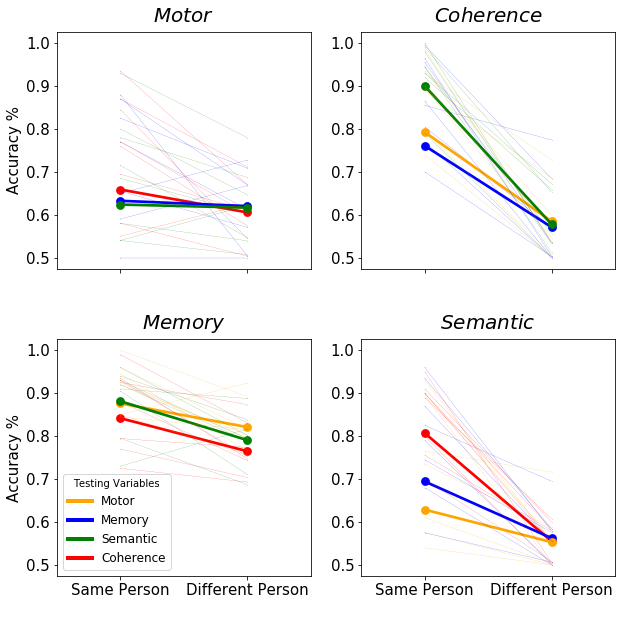

In [216]:
#Different Task (fig 2)
#need to add lines for individual Persons
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='red', lw=4)]
#Create figure space
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
"""
fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
#Motor
ax2=fig.add_subplot(gs[0,0])
#plt.setp(ax2.get_xticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','blue','green'],ci=None, data=diff_motor, ax=ax2)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_sem, palette=['green'],ax=ax2)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_mem, palette=['blue'],ax=ax2)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_glass, palette=['red'],ax=ax2)
g3.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#y=[.5,.75,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %",fontsize=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#Glass
ax1=fig.add_subplot(gs[0,1],sharey=ax2)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", palette=['blue','orange','green'],ci=None, data=diff_glass, ax=ax1)
#plt.setp(ax1.get_xticklabels(), visible=False)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_sem, palette=['green'],ax=ax1)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_mem, palette=['blue'],ax=ax1)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_mot, palette=['orange'],ax=ax1)
g3.legend_.remove()
ax.set(ylabel=' ')
ax.set_title('$Coherence$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.5, 1),title='Testing Variables')
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#Memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','orange','green'],ci=None, data=diff_mem, ax=ax3)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_sem, palette=['green'],ax=ax3)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_glass, palette=['red'],ax=ax3)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_mot, palette=['orange'],ax=ax3)
g3.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='lower left',fontsize='large',title='Testing Variables')

ax.tick_params(labelsize=15)
#y=[.5,.75,1.0]
#plt.yticks(y)
plt.xlabel(' ')
#plt.xlabel('Different Task', fontsize=15)
plt.ylabel("Accuracy %",fontsize=15)
#Semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['red','blue','orange'], data=diff_sem, ax=ax4)
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_glass, palette=['red'],ax=ax4)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_mem, palette=['blue'],ax=ax4)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_mot, palette=['orange'],ax=ax4)
g3.legend_.remove()
ax.set_title('$Semantic$', fontsize=20, pad=10)
#plt.xlabel('Different Task', fontsize=15)
ax.set(ylabel=' ')
plt.xlabel(' ')

ax.tick_params(labelsize=15)
#plt.savefig(thisDir+'output/FigsFinal/SSBS_point_plots.png', bbox_inches='tight')


plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/SSBS_point_plots.png', bbox_inches='tight')

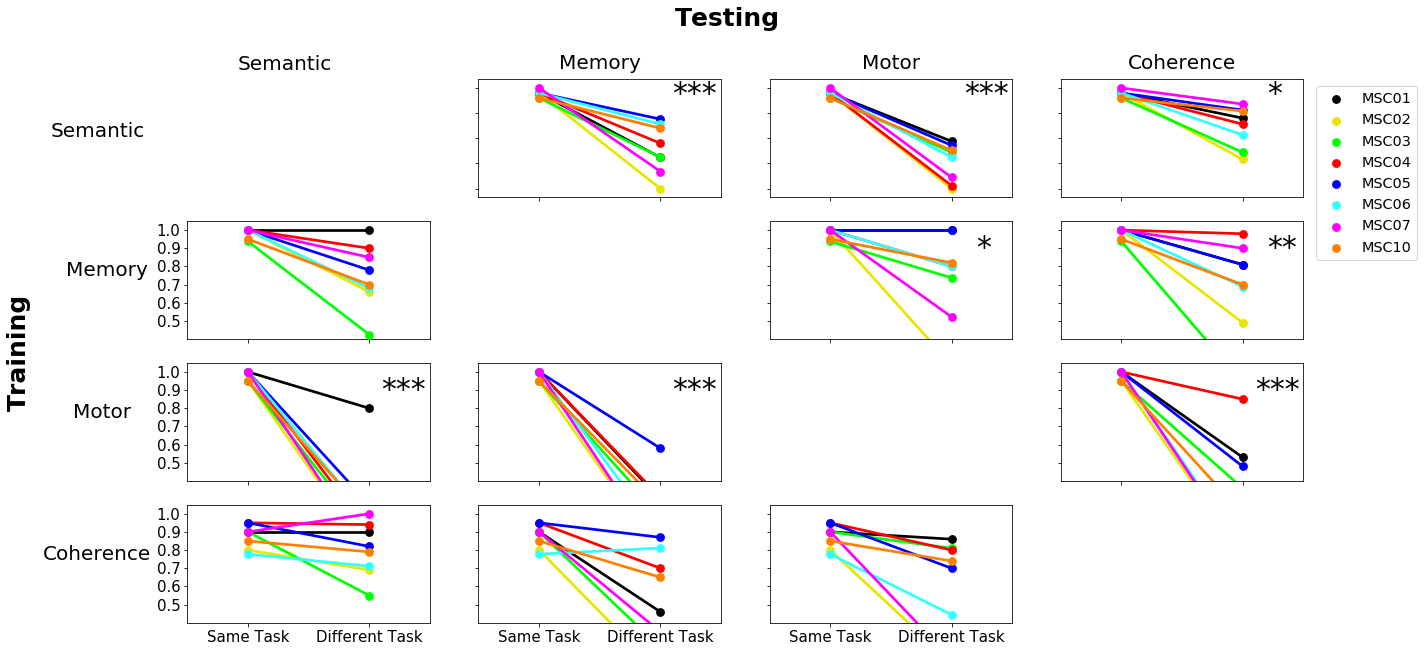

In [66]:
#CV-SS (Fig 3)
CV=pd.read_csv(outDir+'CV/acc.csv',usecols=[0,1,2])
BS=pd.read_csv(outDir+'BS/acc.csv', usecols=[0,1,2,3,4])
SS=pd.read_csv(outDir+'SS/sep_task_acc.csv')
#SS=pd.read_csv(outDir+'SS/acc.csv', usecols=[0,1,2,3])
DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[0,1,2,3])
CV.rename(columns={'task':'train_task'},inplace=True)
DS.rename(columns={'task':'train_task'},inplace=True)
SS_task=SS.merge(CV, how='left', on=['train_task','sub'],suffixes=('_Diff','_Same'))
OS_task=BS.merge(DS,how='left',on=['train_task','train_sub','test_sub'],suffixes=('','_DS'))
SS_task.rename(columns={'acc_Diff':'Diff','acc_Same':'Same'},inplace=True)
OS_task.rename(columns={'acc':'Diff','acc_DS':'Same'},inplace=True)

#CV m SS
#train motor test memory 
motTmem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=pd.melt(motTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test semantic 
motTsem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=pd.melt(motTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test glass
motTglass=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=pd.melt(motTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=pd.melt(memTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test semantic 
memTsem=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=pd.melt(memTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test glass
memTglass=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=pd.melt(memTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test semantic 
glassTsem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test memory
glassTmem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=pd.melt(semTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test glass
semTglass=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=pd.melt(semTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test memory
semTmem=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=pd.melt(semTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

 
#Diff task 
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.0001, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')



#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.text(1.1, .85, '***',fontsize=30)
"""
#Test Semantic blank
ax0=fig.add_subplot(gs[0,0],sharey=ax1)
y=[.5,.75,1.0]
plt.yticks(y,fontsize=15)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)
ax.set(ylim=(.4, 1.05))
"""
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.text(1.1, .85, '***',fontsize=30)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.text(1.2, .85, '*',fontsize=30)
#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(.4, 1.05))
ax.tick_params(labelsize=15)
plt.yticks(y)
#Memory test memory\
"""
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
"""
#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.text(1.2, .85, '*',fontsize=30)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.text(1.2, .85, '**',fontsize=30)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
ax.tick_params(labelsize=15)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.text(1.1, .85, '***',fontsize=30)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
ax9.text(1.1, .85, '***',fontsize=30)

"""
#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)
"""
#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)
ax11.text(1.1, .85, '***',fontsize=30)

#Glass test semantic
ax12=fig.add_subplot(gs[3,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.tick_params(labelsize=15)

#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)


#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
"""
#glass test glass
ax15=fig.add_subplot(gs[3,3])
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)
"""
#*p<.05 **p<.01 ***p<.001
#based on permutation testing 
#* train mem test motor train semantic test glass 
#**train mem test glass 
#*** train motor test on all train semantic test mem and motor 





fig.text(.16, .893, 'Semantic',fontsize=20)
fig.text(.03, .8, 'Semantic',fontsize=20)

#plt.savefig(thisDir+'output/FigsFinal/DT_CVmSS_plots.png', bbox_inches='tight')




In [67]:
#All trained on semantic merging testing tasks
semanticAll=pd.concat([semTmem, semTmot, semTglass])
#Motor
motorAll=pd.concat([motTmem, motTsem, motTglass])
#Memory
memAll=pd.concat([memTsem, memTmot, memTglass])
#Glass
glassAll=pd.concat([glassTmem, glassTmot, glassTsem])

In [80]:
glassAll.groupby(['sub','Analysis']).mean()

acc
sub   Analysis          
MSC01 Diff      0.740000
      Same      0.900000
MSC02 Diff      0.330000
      Same      0.800000
MSC03 Diff      0.540833
      Same      0.900000
MSC04 Diff      0.813333
      Same      0.950000
MSC05 Diff      0.796667
      Same      0.950000
MSC06 Diff      0.655556
      Same      0.777778
MSC07 Diff      0.516667
      Same      0.900000
MSC10 Diff      0.726667
      Same      0.850000

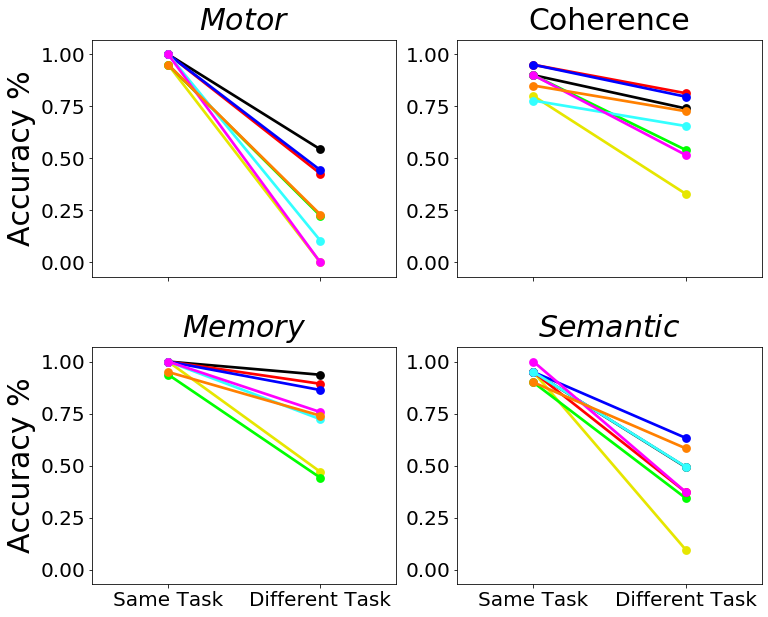

In [69]:
fig=plt.figure(figsize=(12,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task
#All Glass
"""
fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motorAll, ax=ax1)
ax.set_title('$Motor$',fontsize=30, pad=10)
ax.set(xlabel='')
plt.ylabel('Accuracy %',fontsize=30)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=20)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassAll, ax=ax2)
ax.set_title('Coherence',fontsize=30, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
#plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=20)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memAll, ax=ax3)
ax.set_title('$Memory$',fontsize=30, pad=10)
plt.xlabel('')#,fontsize=15)
plt.ylabel('Accuracy %',fontsize=30)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)

ax.tick_params(labelsize=20)
#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semanticAll,ax=ax4)
ax.set_title('$Semantic$',fontsize=30, pad=10)
plt.xlabel('')#, fontsize=15)
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()
ax.tick_params(labelsize=20)
#y=[.6,.8,1.0]
#plt.yticks(y)
#plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021//condensed_CVmSS_plots.png', bbox_inches='tight')
#plt.savefig(thisDir+'output/FigsFinal/condensed_CVmSS_plots.png', bbox_inches='tight')

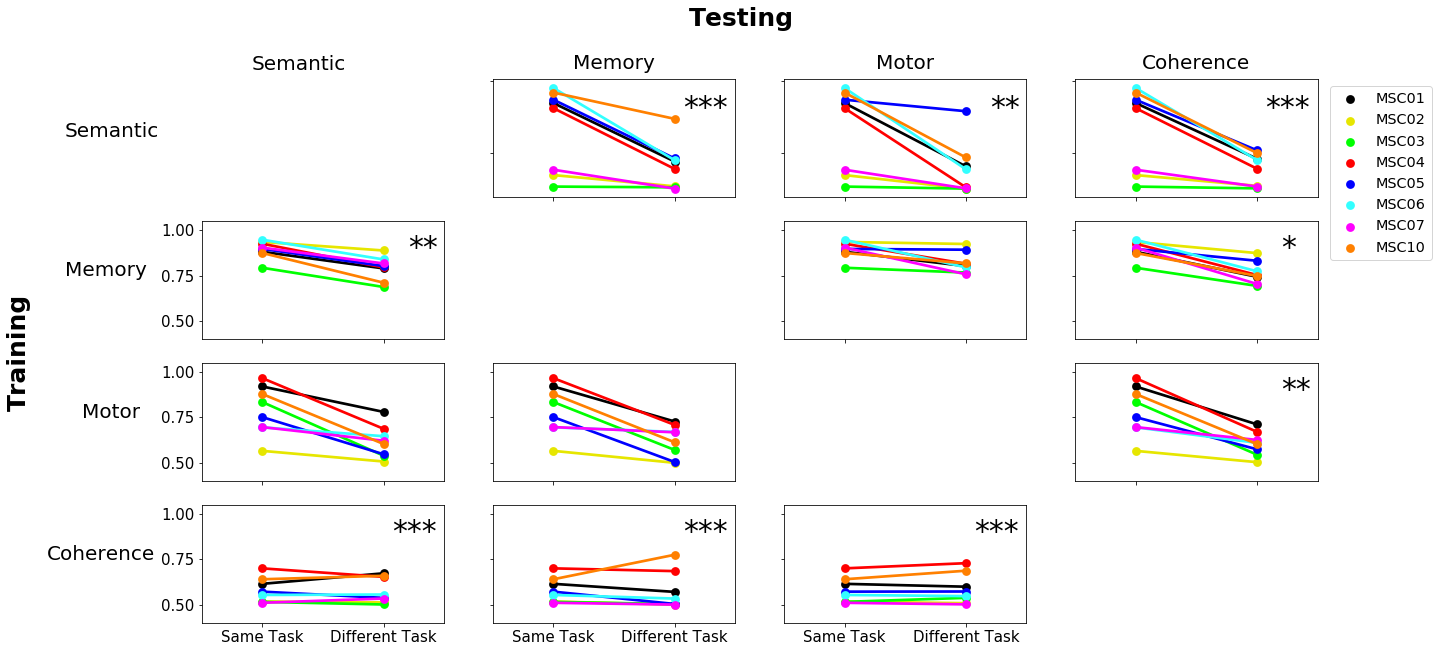

In [51]:
#DSmBS (Fig 4)
#train motor test memory 
motTmem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=motTmem.groupby('train_sub').mean()
motTmem.reset_index(inplace=True)
motTmem=pd.melt(motTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train motor test semantic 
motTsem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=motTsem.groupby('train_sub').mean()
motTsem.reset_index(inplace=True)
motTsem=pd.melt(motTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train motor test glass
motTglass=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=motTglass.groupby('train_sub').mean()
motTglass.reset_index(inplace=True)
motTglass=pd.melt(motTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=memTmot.groupby('train_sub').mean()
memTmot.reset_index(inplace=True)
memTmot=pd.melt(memTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test semantic 
memTsem=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=memTsem.groupby('train_sub').mean()
memTsem.reset_index(inplace=True)
memTsem=pd.melt(memTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test glass
memTglass=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=memTglass.groupby('train_sub').mean()
memTglass.reset_index(inplace=True)
memTglass=pd.melt(memTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=glassTmot.groupby('train_sub').mean()
glassTmot.reset_index(inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test semantic 
glassTsem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=glassTsem.groupby('train_sub').mean()
glassTsem.reset_index(inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test memory
glassTmem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=semTmot.groupby('train_sub').mean()
semTmot.reset_index(inplace=True)
semTmot=pd.melt(semTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test glass
semTglass=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=semTglass.groupby('train_sub').mean()
semTglass.reset_index(inplace=True)
semTglass=pd.melt(semTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test memory
semTmem=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=semTmem.groupby('train_sub').mean()
semTmem.reset_index(inplace=True)
semTmem=pd.melt(semTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
 
#Diff task 
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.01, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')
"""
#Test Semantic blank
ax0=fig.add_subplot(gs[0,0],sharey=ax1)
y=[.5,.75,1.0]
plt.yticks(y,fontsize=15)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)
ax.set(ylim=(.4, 1.05))
"""
#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
ax1.text(1.07, .7, '***',fontsize=30)
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.text(1.2, .7, '**',fontsize=30)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.text(1.07, .7, '***',fontsize=30)
#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
ax.tick_params(labelsize=15)
ax4.text(1.2, .85, '**',fontsize=30)
"""
#Memory test memory
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
"""
#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.text(1.2, .85, '*',fontsize=30)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
ax.tick_params(labelsize=15)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
plt.setp(ax8.get_xticklabels(), visible=False)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
"""
#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)
"""
#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)
ax11.text(1.2, .85, '**',fontsize=30)
#Glass test semantic
ax12=fig.add_subplot(gs[3,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax12.text(1.07, .85, '***',fontsize=30)
#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax13.text(1.07, .85, '***',fontsize=30)

#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax14.text(1.07, .85, '***',fontsize=30)
"""
#glass test glass
ax15=fig.add_subplot(gs[3,3])
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)
"""
#* train mem test glass 
#** mem semantic and motor glass and semantic motor 
#***  semantic mem and semantix glass and glass test all 
fig.text(.16, .893, 'Semantic',fontsize=20)
fig.text(.03, .8, 'Semantic',fontsize=20)
plt.savefig(thisDir+'output/FigsFinal/DT_DSmBS_plots.png', bbox_inches='tight')


In [57]:
#Broad overview of different sub but same task to different task
#All trained on semantic merging testing tasks
semanticAll=pd.concat([semTmem, semTmot, semTglass])
#Motor
motorAll=pd.concat([motTmem, motTsem, motTglass])
#Memory
memAll=pd.concat([memTsem, memTmot, memTglass])
#Glass
glassAll=pd.concat([glassTmem, glassTmot, glassTsem])

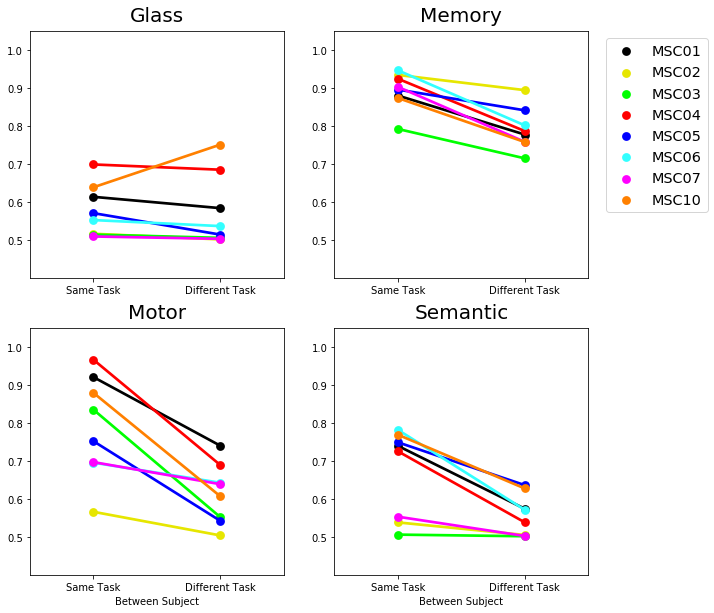

In [58]:
#Diff task 
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2)
#Broad overview of changing from same task to diff task
#All Glass
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassAll, ax=ax1)
ax.set_title('Glass',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.set(ylim=(.4, 1.05))
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memAll, ax=ax2)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motorAll, ax=ax3)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='Between Subject')
ax.set(ylabel='')
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, ax=ax4, data=semanticAll)
ax.set_title('Semantic',fontsize=20, pad=10)
ax.set(xlabel='Between Subject')
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()

#plt.savefig(thisDir+'output/FigsFinal/condensed_DSmBS_plots.png', bbox_inches='tight')

In [225]:
#All tasks (Fig 5)
df=pd.read_csv(outDir+'ALL/precision_acc.csv')
df_re=df.groupby(['train_sub']).mean()
df_re.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_re.reset_index(inplace=True)
res=pd.melt(df_re, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

sixty_days=pd.read_csv(thisDir+'output/results/permutation/manDays.csv')
sixty_days.rename(columns={'Within':'Same Person','Between':'Different Person'},inplace=True)
sixty_res=pd.melt(sixty_days, id_vars=['Days'], value_vars=['Same Person', 'Different Person'],var_name='Analysis',value_name='acc')

Text(0.5, 0, 'Sample Pairs')

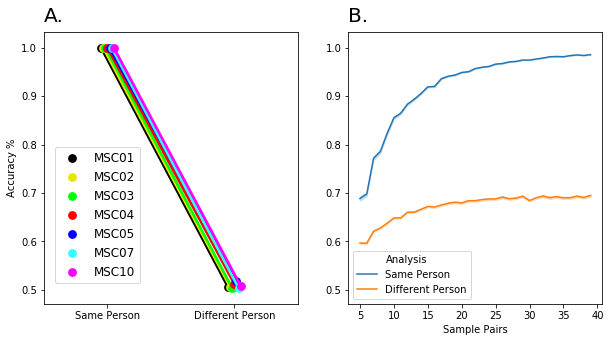

In [227]:
fig=plt.figure(figsize=(10,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2,hspace=.3)
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax1,ci=None, data=res, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax1.set_title('A.',fontsize=20, pad=10,loc='left')
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %")
plt.xlabel(' ')
plt.legend(bbox_to_anchor=(.4, .6),loc='upper right',fontsize='large')

#Manipulating Days (Fig 6)
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
sns.lineplot(x='Days', y='acc', hue='Analysis', ax=ax2, data=sixty_res)
ax2.set_title('B.',fontsize=20, pad=10,loc='left')
plt.ylabel(" ")
plt.xlabel("Sample Pairs")

#plt.savefig(thisDir+'output/FigsFinal/allTasks_quality.png', bbox_inches='tight')


In [48]:
#Feature selection (Fig 7 and 8)
#subnetworks overlapped with random network sampling
rand_DS=pd.read_csv(randDir+'DS/acc.csv')
rand_SS=pd.read_csv(randDir+'SS/acc.csv')
rand_BS=pd.read_csv(randDir+'BS/acc.csv')
rand_CV=pd.read_csv(randDir+'CV/acc.csv')

#zscored subnetworks
CV_z=pd.read_csv(randDir+'CV/zscore_splitTask.csv')
DS_z=pd.read_csv(randDir+'DS/zscore_splitTask.csv')
#CV_z=pd.read_csv(randDir+'CV/zscore_all.csv')
SS_z=pd.read_csv(randDir+'SS/zscore_all.csv')
#DS_z=pd.read_csv(randDir+'DS/zscore_all.csv')
BS_z=pd.read_csv(randDir+'BS/zscore_all.csv')

CV_z['Analysis']='Same Person'
SS_z['Analysis']='Same Subject'
DS_z['Analysis']='Different Person'
BS_z['Analysis']='Different Subject'

ST_z=pd.concat([CV_z, DS_z])
DT_z=pd.concat([SS_z,BS_z])

def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)

percentiles_CV=rand_CV.groupby(['features','task']).agg({'acc': [p5, p95]})
percentiles_CV.columns = percentiles_CV.columns.droplevel()
percentiles_CV.reset_index(inplace=True)



percentiles_DS=rand_DS.groupby(['features','task']).agg({'acc': [p5, p95]})
percentiles_DS.columns = percentiles_DS.columns.droplevel()
percentiles_DS.reset_index(inplace=True)




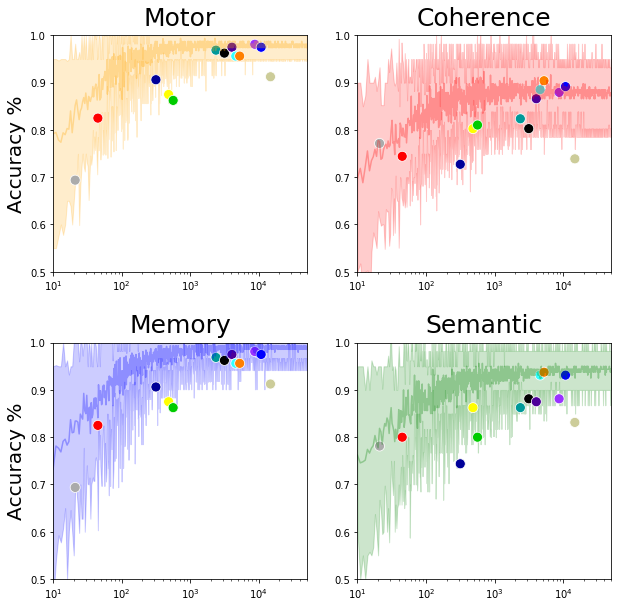

In [44]:
#Feature selection compared to null (Fig 7)
#fig=plt.figure(figsize=(20,20), constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
#gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)

#Comparing same sub same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task

#CV split up tasks
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="features", y='acc',data=rand_CV[rand_CV['task']=='motor'],ci=None, color='orange',alpha=.3,ax=ax1)
ax.fill_between(percentiles_CV[percentiles_CV['task']=='motor'].features,percentiles_CV[percentiles_CV['task']=='motor'].p5,percentiles_CV[percentiles_CV['task']=='motor'].p95,alpha=.2,color='orange')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='motor'],ax=ax1, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Motor',fontsize=25, pad=10)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
#ax.tick_params(labelsize=20,pad=10)


ax2=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="features", y='acc',data=rand_CV[rand_CV['task']=='glass'],ci=None, color='red',alpha=.3,ax=ax2)
ax.fill_between(percentiles_CV[percentiles_CV['task']=='glass'].features,percentiles_CV[percentiles_CV['task']=='glass'].p5,percentiles_CV[percentiles_CV['task']=='glass'].p95,alpha=.2,color='red')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='glass'],ax=ax2, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Coherence',fontsize=25, pad=10)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))

ax3=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="features", y='acc',data=rand_CV[rand_CV['task']=='mem'],ci=None, color='blue',alpha=.3,ax=ax3)
ax.fill_between(percentiles_CV[percentiles_CV['task']=='mem'].features,percentiles_CV[percentiles_CV['task']=='mem'].p5,percentiles_CV[percentiles_CV['task']=='mem'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='motor'], ax=ax3,color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Memory',fontsize=25, pad=10)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))




ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="features", y='acc',data=rand_CV[rand_CV['task']=='semantic'],ci=None, color='green',alpha=.3,ax=ax4)
ax.fill_between(percentiles_CV[percentiles_CV['task']=='semantic'].features,percentiles_CV[percentiles_CV['task']=='semantic'].p5,percentiles_CV[percentiles_CV['task']=='semantic'].p95,alpha=.2,color='green')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='semantic'],ax=ax4, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Semantic',fontsize=25, pad=10)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
plt.savefig(thisDir+'output/FigsFinal/splitCVfeature_plots.png', bbox_inches='tight')

In [58]:
ST_z.max()

network          visual
task           semantic
acc              0.9875
feature           14808
mu                0.995
std            0.153955
z_score        0.589723
Analysis    Same Person
dtype: object

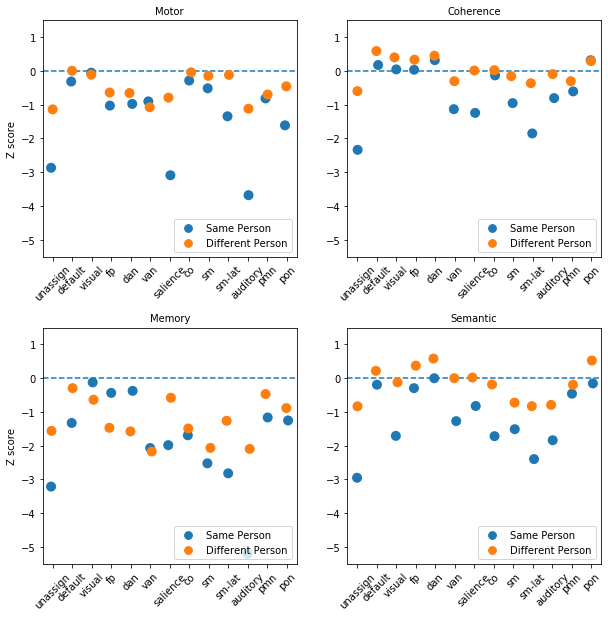

In [62]:
#CV split task z scores 
#Feature selection compared to null (Fig 7)
#fig=plt.figure(figsize=(20,20), constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
#gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
#Comparing same sub same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task

#CV split up tasks
ax1=fig.add_subplot(gs[0,0])
ax=sns.stripplot(x='network', y='z_score', hue='Analysis',data=ST_z[ST_z['task']=='motor'], hue_order=['Same Person','Different Person'],jitter=True, ax=ax1,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Motor',fontsize=10)
ax.set_ylabel("Z score", fontsize=10)
ax.set_xlabel('')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=10)
ax.set(ylim=(-5.5, 1.5))
ax.axhline(0, ls='--')
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.stripplot(x='network', y='z_score', hue='Analysis',data=ST_z[ST_z['task']=='glass'], hue_order=['Same Person','Different Person'],jitter=True, ax=ax2,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Coherence',fontsize=10)
ax.set_ylabel("")
ax.set_xlabel('')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=10)
ax.axhline(0, ls='--')
ax3=fig.add_subplot(gs[1,0])
ax=sns.stripplot(x='network', y='z_score', hue='Analysis',data=ST_z[ST_z['task']=='mem'], hue_order=['Same Person','Different Person'],jitter=True, ax=ax3,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Memory',fontsize=10)
ax.set_ylabel("Z score", fontsize=10)
ax.set_xlabel('')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=10)
ax.set(ylim=(-5.5, 1.5))
ax.axhline(0, ls='--')


ax4=fig.add_subplot(gs[1,1],sharey=ax3)
ax=sns.stripplot(x='network', y='z_score', hue='Analysis',data=ST_z[ST_z['task']=='semantic'], hue_order=['Same Person','Different Person'],jitter=True, ax=ax4,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Semantic',fontsize=10)
ax.set_ylabel("")
ax.set_xlabel('')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=10)
ax.axhline(0, ls='--')
plt.savefig(thisDir+'output/FigsFinal/splitzscore_plots.png', bbox_inches='tight')

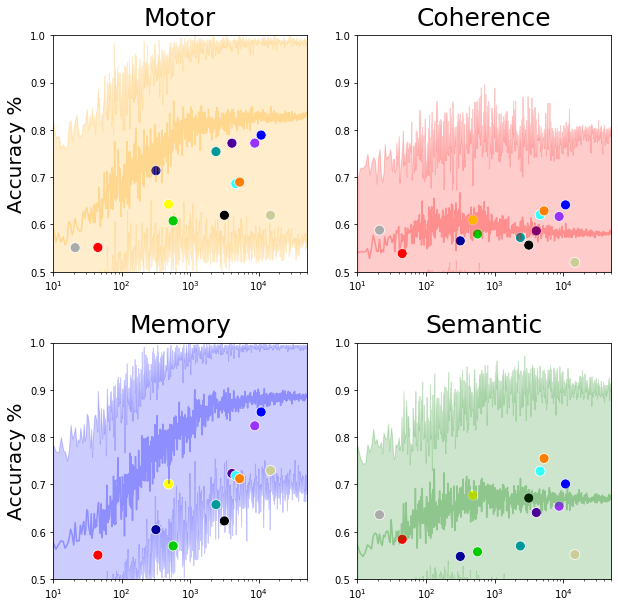

In [45]:
#Feature selection compared to null (Fig 7)
#fig=plt.figure(figsize=(20,20), constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
#gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)

#Comparing same sub same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task

#DS split up tasks
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="features", y='acc',data=rand_DS[rand_DS['task']=='motor'],ci=None, color='orange',alpha=.3,ax=ax1)
ax.fill_between(percentiles_DS[percentiles_DS['task']=='motor'].features,percentiles_DS[percentiles_DS['task']=='motor'].p5,percentiles_DS[percentiles_DS['task']=='motor'].p95,alpha=.2,color='orange')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='motor'],ax=ax1, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Motor',fontsize=25, pad=10)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
#ax.tick_params(labelsize=20,pad=10)


ax2=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="features", y='acc',data=rand_DS[rand_DS['task']=='glass'],ci=None, color='red',alpha=.3,ax=ax2)
ax.fill_between(percentiles_DS[percentiles_DS['task']=='glass'].features,percentiles_DS[percentiles_DS['task']=='glass'].p5,percentiles_DS[percentiles_DS['task']=='glass'].p95,alpha=.2,color='red')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='glass'],ax=ax2, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Coherence',fontsize=25, pad=10)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))

ax3=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="features", y='acc',data=rand_DS[rand_DS['task']=='mem'],ci=None, color='blue',alpha=.3,ax=ax3)
ax.fill_between(percentiles_DS[percentiles_DS['task']=='mem'].features,percentiles_DS[percentiles_DS['task']=='mem'].p5,percentiles_DS[percentiles_DS['task']=='mem'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='mem'], ax=ax3,color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Memory',fontsize=25, pad=10)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))




ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="features", y='acc',data=rand_DS[rand_DS['task']=='semantic'],ci=None, color='green',alpha=.3,ax=ax4)
ax.fill_between(percentiles_DS[percentiles_DS['task']=='semantic'].features,percentiles_DS[percentiles_DS['task']=='semantic'].p5,percentiles_DS[percentiles_DS['task']=='semantic'].p95,alpha=.2,color='green')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='semantic'],ax=ax4, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Semantic',fontsize=25, pad=10)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))

plt.savefig(thisDir+'output/FigsFinal/splitDSfeature_plots.png', bbox_inches='tight')

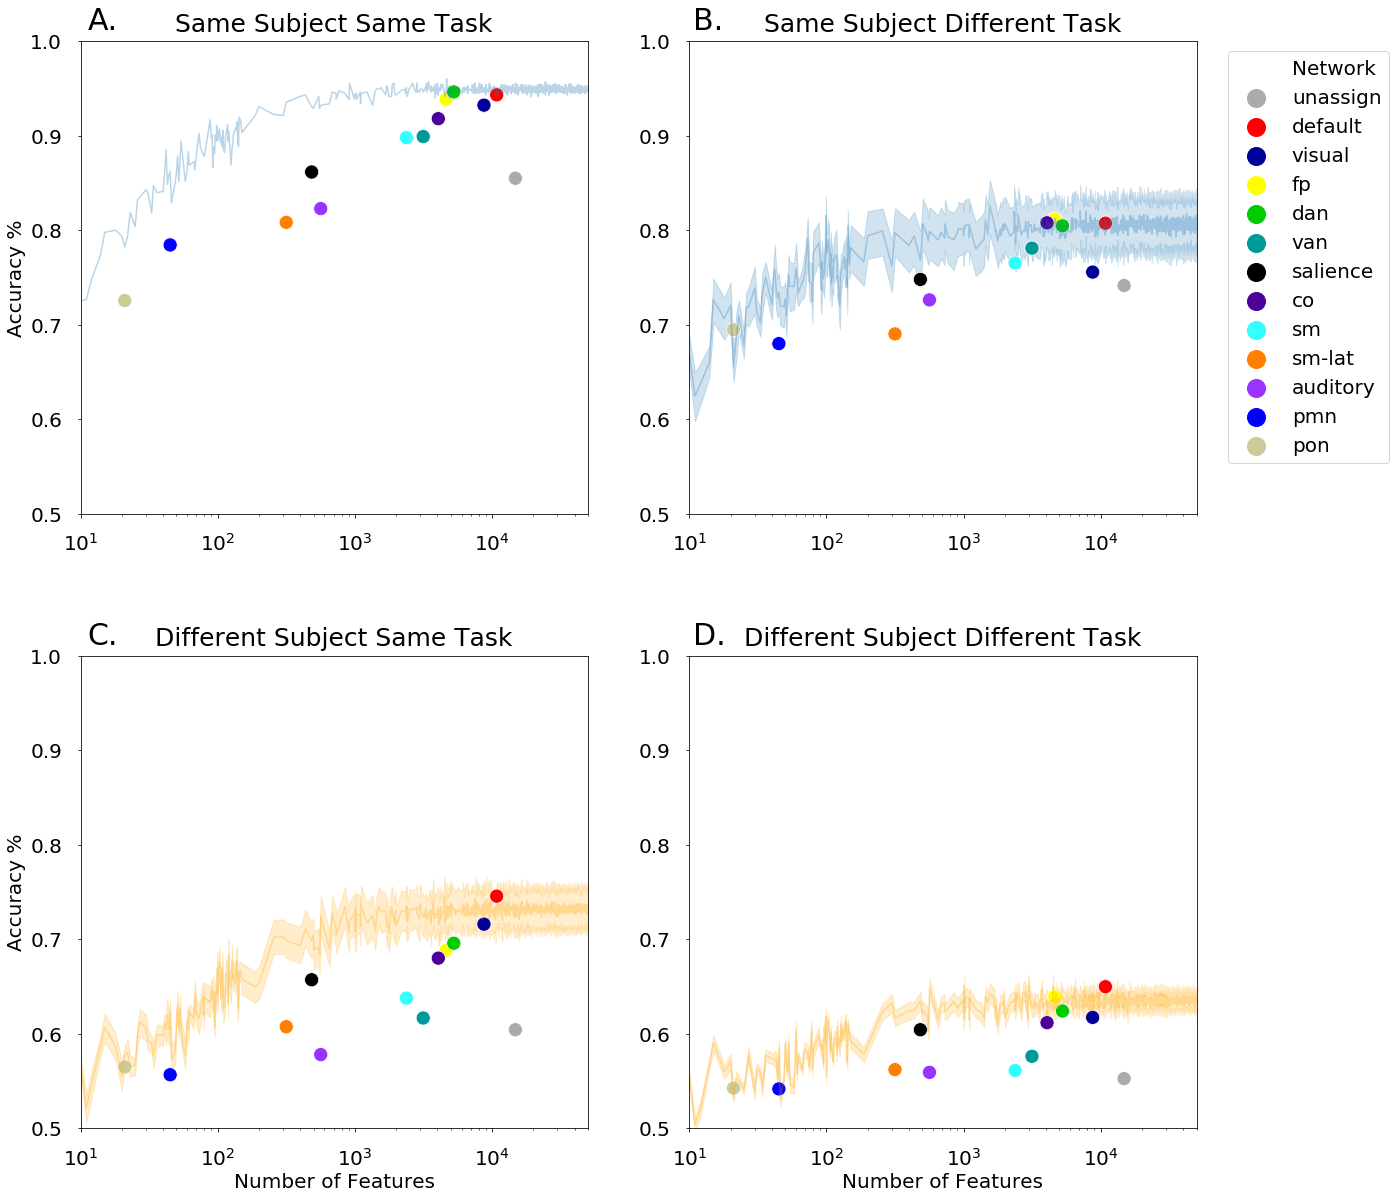

In [205]:
#Feature selection compared to null (Fig 7)
fig=plt.figure(figsize=(20,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)



#CV
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="features", y='acc',ci=None,data=rand_CV, ax=ax1,alpha=.3)

ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=CV_z, ax=ax1, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Subject Same Task',fontsize=25, pad=10)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=20,pad=15)

#DS
ax2=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="features", y='acc',data=rand_DS, ax=ax2, color='orange',alpha=.3)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=DS_z, ax=ax2, color='r',legend=False,s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Same Task',fontsize=25, pad=10)
ax.set_ylabel("Accuracy %", fontsize=20)
plt.xlabel('Number of Features',fontsize=20)
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=20,pad=15)

#SS
ax3=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="features", y="acc",data=rand_SS, ax=ax3,alpha=.3)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=SS_z, ax=ax3, color='r',s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Subject Different Task',fontsize=25, pad=10)
ax.set_ylabel('')
ax.set_xlabel(' ')
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=20,pad=15)
plt.legend(markerscale=3, bbox_to_anchor=(1.4, 1),fontsize=20)
#BS
ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="features", y="acc",data=rand_BS, ax=ax4, color='orange',alpha=.3)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=BS_z, ax=ax4, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Different Task',fontsize=25, pad=10)
ax.set_ylabel('')
plt.xlabel('Number of Features',fontsize=20)
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=20,pad=15)









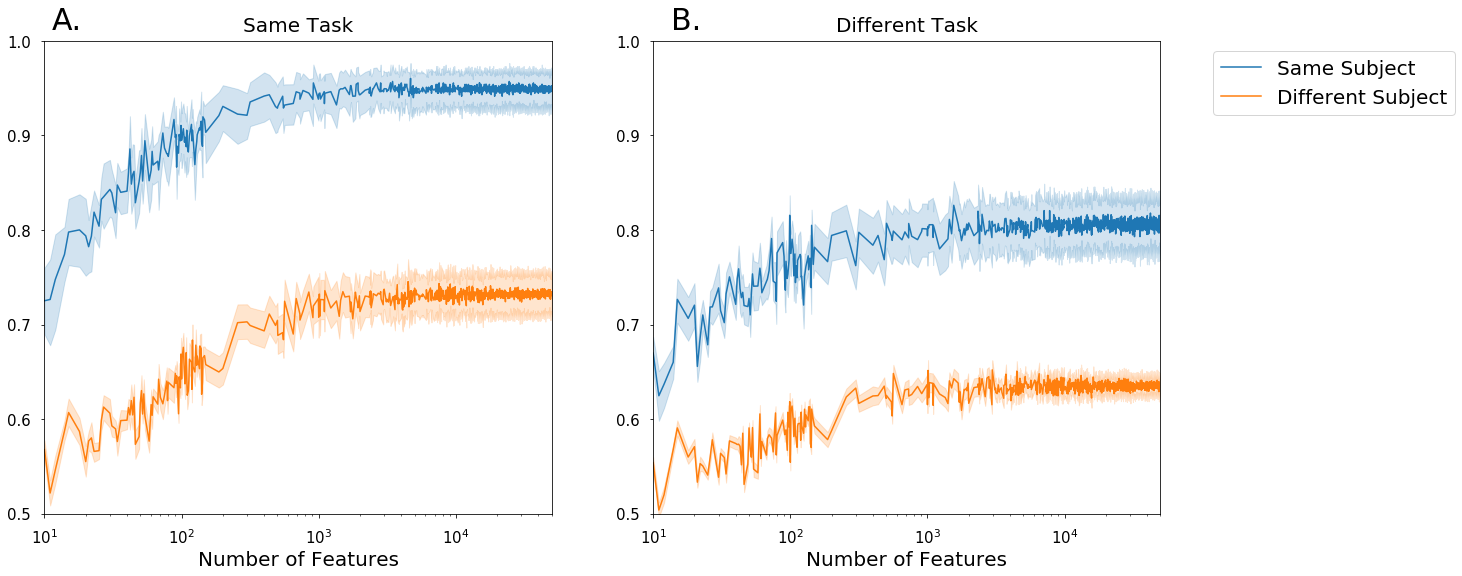

In [617]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
fig=plt.figure(figsize=(20,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)
fig.text(.13, .888, 'A.',fontsize=30)
fig.text(.56, .888, 'B.',fontsize=30)
ax7 = fig.add_subplot(gs[0, 0])
ax = sns.lineplot(x="features", y="acc",data=rand_CV, ax=ax7)
ax.set(xscale="log")
g = sns.lineplot(x="features", y="acc",data=rand_DS, ax=ax7)
ax.set_title('Same Task',fontsize=20, pad=10)
ax.set_ylabel('')
ax.set_xlabel('Number of Features',fontsize=20)
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=15,pad=10)


ax8 = fig.add_subplot(gs[0, 1])
ax = sns.lineplot(x="features", y="acc",data=rand_SS, ax=ax8)
g = sns.lineplot(x="features", y="acc",data=rand_BS, ax=ax8)
ax.set(xscale="log")
ax.set_title('Different Task',fontsize=20, pad=10)
ax.set_ylabel(" ")
ax.set_xlabel('Number of Features',fontsize=20)
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=15,pad=10)
ax.legend(('Same Subject', 'Different Subject'),loc='upper right',fontsize=20,bbox_to_anchor=(1.6, 1.0))

plt.savefig(thisDir+'output/FigsFinal/feature_overlap.png', bbox_inches='tight')



In [3]:
ST_z = ST_z.sort_values(['features'],ascending=False).reset_index(drop=True)

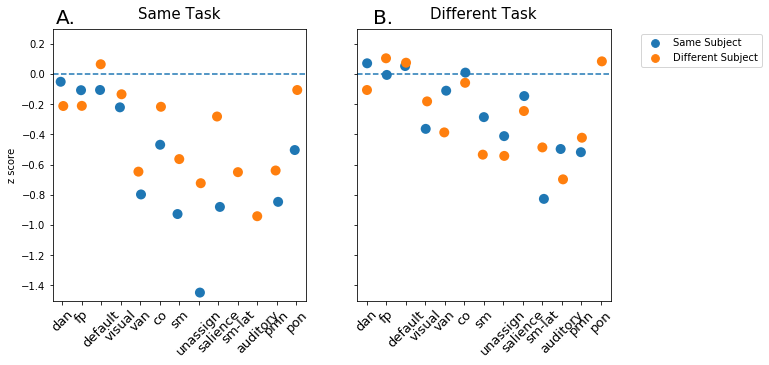

In [20]:
#Feature Z score (Fig 8)
fig=plt.figure(figsize=(10,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .895, 'A.',fontsize=20)
fig.text(.57, .895, 'B.',fontsize=20)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2, hspace=.3)
ax1=fig.add_subplot(gs[0,0])
ax=sns.stripplot(x='Network', y='z_score', hue='Analysis', data=ST_z, ax=ax1,s=10,order=['dan','fp','default','visual','van', 'co','sm','unassign','salience','sm-lat','auditory','pmn','pon'])#,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.legend_.remove()
ax.set_title('Same Task',fontsize=15, pad=10)
#x.xaxis.tick_top()
ax.axhline(0, ls='--')
plt.ylabel('z score')
plt.xlabel('')
ax.set(ylim=(-1.5, .3))
plt.xticks(rotation=45,fontsize=13)

ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.stripplot(x='Network', y='z_score', hue='Analysis', data=DT_z, ax=ax2,s=10,order=['dan','fp','default','visual','van', 'co','sm','unassign','salience','sm-lat','auditory','pmn','pon'])#,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Task',fontsize=15, pad=10)
ax.axhline(0, ls='--')
plt.xlabel('')
plt.ylabel(' ')
plt.legend(markerscale=1, bbox_to_anchor=(1.1, 1),fontsize=10)
plt.xticks(rotation=45,fontsize=13)
plt.savefig(thisDir+'output/FigsFinal/zscore_scatterplots.png', bbox_inches='tight')


In [10]:
#manipulating frames
CV_permutations=pd.read_csv(thisDir+'output/results/permutation/CV/frames.csv')
BS_permutations=pd.read_csv(thisDir+'output/results/permutation/BS/frames.csv')
SS_permutations=pd.read_csv(thisDir+'output/results/permutation/SS/frames.csv')
DS_permutations=pd.read_csv(thisDir+'output/results/permutation/DS/frames.csv')

In [11]:
CV_permutations=CV_permutations[(CV_permutations['frames']<300)]
BS_permutations=BS_permutations[(BS_permutations['frames']<300)]
SS_permutations=SS_permutations[(SS_permutations['frames']<300)]
DS_permutations=DS_permutations[(DS_permutations['frames']<300)]

CV_permutations['Time']=(CV_permutations['frames']*2.2)/60
BS_permutations['Time']=(BS_permutations['frames']*2.2)/60
SS_permutations['Time']=(SS_permutations['frames']*2.2)/60
DS_permutations['Time']=(DS_permutations['frames']*2.2)/60

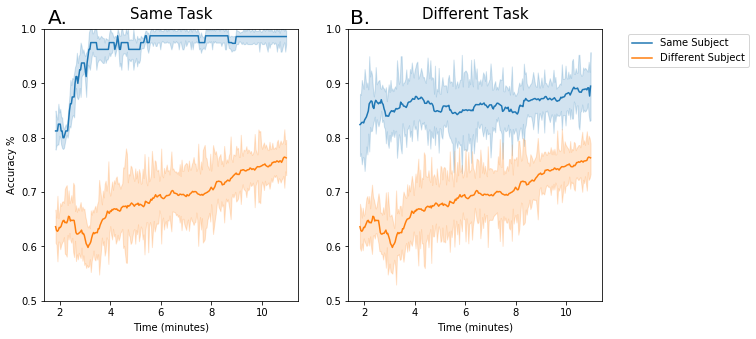

In [230]:
#Manipulating number of frames train task memory (Fig 9)
fig=plt.figure(figsize=(10,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2, hspace=.3)
#CV_permutations['acc'].rolling(30).mean()
#SS_permutations['acc'].rolling(30).mean()
#BS_permutations['acc'].rolling(30).mean()
#DS_permutations['acc'].rolling(30).mean()
#CV v DS
fig.text(.13, .895, 'A.',fontsize=20)
fig.text(.55, .895, 'B.',fontsize=20)
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="Time", y='acc',data=CV_permutations,ax=ax1)#,hue='train_sub',color='r', palette=['2','5','6','7'])
ax=sns.lineplot(x="Time",y='acc',data=DS_permutations,ax=ax1)
ax.set_title('Same Task',fontsize=15, pad=10)
ax.set(ylim=(.5, 1))
ax.set_xlabel('Time (minutes)')
ax.set_ylabel("Accuracy %")
ax.tick_params(labelsize=10)
#SS v BS
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax = sns.lineplot(x="Time", y='acc',data=SS_permutations,ax=ax2)
ax=sns.lineplot(x='Time',y='acc',data=BS_permutations,ax=ax2)
ax.set_title('Different Task',fontsize=15, pad=10)
ax.set(ylim=(.5, 1))
ax.set_ylabel('')
ax.set_xlabel('Time (minutes)')
ax.tick_params(labelsize=10)
ax.legend(('Same Subject', 'Different Subject'),loc='upper right',fontsize=10,bbox_to_anchor=(1.6, 1.0))
#plt.savefig(thisDir+'output/FigsFinal/manFramesplots.png', bbox_inches='tight')



In [119]:
ALL=pd.read_csv(outDir+'/ALL/acc.csv')
ALL['clf']='Ridge'
#SS
SS=pd.read_csv(outDir+'SS/acc.csv')
BS=pd.read_csv(outDir+'BS/acc.csv')
#DS
DS=pd.read_csv(outDir+'DS/acc.csv')
#CV
CV=pd.read_csv(outDir+'CV/acc.csv')

BS['Analysis']='Different Person'
SS['Analysis']='Same Person'
DS['Analysis']='Different Person'
CV['Analysis']='Same Person'

BS['clf']='Ridge'
SS['clf']='Ridge'
DS['clf']='Ridge'
CV['clf']='Ridge'

SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
CV.drop(columns=['task','sub','spec','sen'],inplace=True)

LR_ALL=pd.read_csv(outDir+'/ALL/acc.csv')
LR_ALL['clf']='Log'
#SS
LR_SS=pd.read_csv(thisDir+'output/results/Log/acc/SS/acc.csv')
LR_BS=pd.read_csv(thisDir+'output/results/Log/acc/BS/acc.csv')
#DS
LR_DS=pd.read_csv(thisDir+'output/results/Log/acc/DS/acc.csv')
#CV
LR_CV=pd.read_csv(thisDir+'output/results/Log/acc/CV/acc.csv')

LR_BS['Analysis']='Different Person'
LR_SS['Analysis']='Same Person'
LR_DS['Analysis']='Different Person'
LR_CV['Analysis']='Same Person'

LR_BS['clf']='Log'
LR_SS['clf']='Log'
LR_DS['clf']='Log'
LR_CV['clf']='Log'

LR_SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
LR_BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
LR_DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
LR_CV.drop(columns=['task','sub','spec','sen'],inplace=True)

SVM_ALL=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/ALL/precision_acc.csv')
SVM_ALL['clf']='SVM'
#SS
SVM_SS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/SS/acc.csv')
SVM_BS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/BS/acc.csv')
#DS
SVM_DS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/DS/acc.csv')
#CV
SVM_CV=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/CV/acc.csv')

SVM_BS['Analysis']='Different Person'
SVM_SS['Analysis']='Same Person'
SVM_DS['Analysis']='Different Person'
SVM_CV['Analysis']='Same Person'

SVM_BS['clf']='SVM'
SVM_SS['clf']='SVM'
SVM_DS['clf']='SVM'
SVM_CV['clf']='SVM'

SVM_SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
SVM_BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
SVM_DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
SVM_CV.drop(columns=['task','sub','spec','sen'],inplace=True)

diffTask=pd.concat([SS,BS, LR_SS, LR_BS,SVM_SS,SVM_BS])
sameTask=pd.concat([CV,DS, LR_CV, LR_DS,SVM_CV,SVM_DS])
allAnalysis=pd.concat([ALL, LR_ALL,SVM_ALL])
allAnalysis.drop(columns=['cv_sen','cv_spec','ds_sen','ds_spec'],inplace=True)
allAnalysis.rename(columns={'acc':'Different Person','cv_acc':'Same Person'},inplace='True')
allAnalysis=pd.melt(allAnalysis,id_vars=['train_sub','test_sub','clf'],value_vars=['Different Person','Same Person'],var_name='Analysis',value_name='acc')


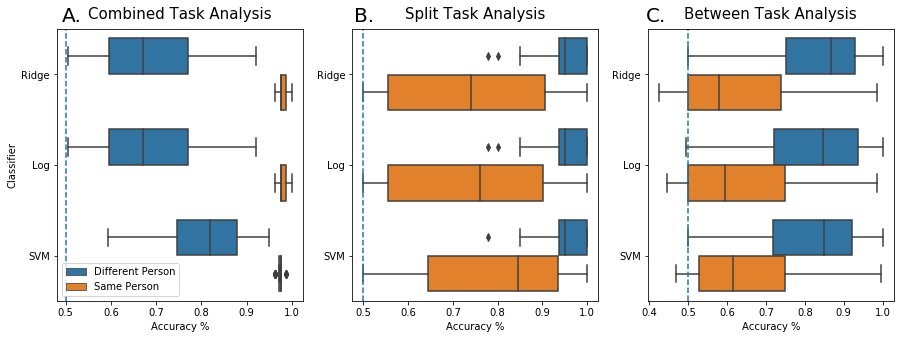

In [134]:
fig=plt.figure(figsize=(15,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .9, 'A.',fontsize=20)
fig.text(.4, .9, 'B.',fontsize=20)
fig.text(.67, .9, 'C.',fontsize=20)
#this is the model comparison for BS CV SS and DS
#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=3,wspace=.2, hspace=.3)

ax0=fig.add_subplot(gs[0,0])
ax=sns.boxplot(x='acc',y='clf',hue='Analysis',data=allAnalysis,orient='h',ax=ax0)
ax.set_title('Combined Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %')
plt.ylabel('Classifier')
#ax0.legend_.remove()
ax0.axvline(.5, ls='--')
ax0.legend(loc='lower left',fontsize=10)
ax1=fig.add_subplot(gs[0,1])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=sameTask,orient='h',ax=ax1)
ax1.set_title('Split Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %')
plt.ylabel('Classifier')
ax1.legend_.remove()
ax1.axvline(.5, ls='--')
plt.ylabel(' ')
ax2=fig.add_subplot(gs[0,2])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=diffTask,orient='h',ax=ax2)
ax2.set_title('Between Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %')
plt.ylabel(' ')
ax2.axvline(.5, ls='--')
ax2.legend_.remove()
#ax2.legend(loc='upper right',fontsize=10,bbox_to_anchor=(1.6, 1.0))
plt.savefig(thisDir+'output/FigsFinal/clf_comp_plots.png', bbox_inches='tight')


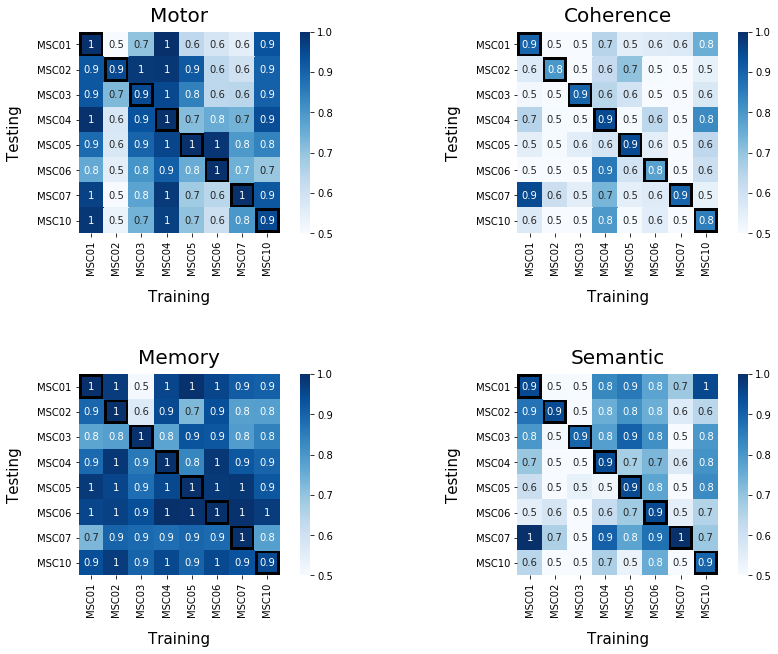

In [2]:
fig=plt.figure(figsize=(15,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True

fig.text(.24, .888, 'A.',fontsize=20)
#fig.text(.64, .888, 'B.',fontsize=20)
#fig.text(.24, .42, 'C.',fontsize=20)
#fig.text(.64, .42, 'D.',fontsize=20)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.1, hspace=.7)
#Comparison to the same sub same task performance
CV=pd.read_csv(outDir+'CV/acc.csv')
grouped_CV=CV.groupby('task')
#diff sub same task 
df=pd.read_csv(outDir+'DS/acc.csv')
grouped_df=df.groupby('task')
for task in taskList:
    #Same sub same task
    task_CV=grouped_CV.get_group(task)
    task_CV.drop(columns=['task'], inplace=True)
    task_CV['test_sub']=task_CV['sub']
    task_CV=task_CV.pivot(index='sub', columns='test_sub', values='acc')
    #Diff sub same task
    task_df=grouped_df.get_group(task)
    task_df.drop(columns=['task'], inplace=True)
    task_df=task_df.pivot(index='test_sub', columns='train_sub', values='acc')
    
    if task=='glass':
        ax1=fig.add_subplot(gs[0,1])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax1,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1,cmap="Blues",ax=ax1,fmt=".1g",square=True)
        ax.set_title('Coherence',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    elif task=='motor':
        ax2=fig.add_subplot(gs[0,0])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True)
        ax.set_title('Motor',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    elif task=='semantic':
        ax3=fig.add_subplot(gs[1,1])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True)
        ax.set_title('Semantic',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    else:
        ax4=fig.add_subplot(gs[1,0])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True)
        ax.set_title('Memory',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)

#plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/sub_comp_heatplots.png', bbox_inches='tight')
 

#plt.savefig(thisDir+'output/FigsFinal/sub_comp_heatplots.png', bbox_inches='tight')


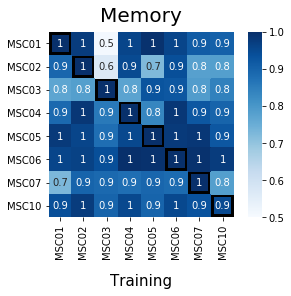

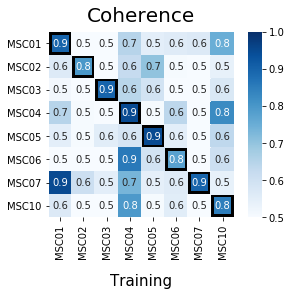

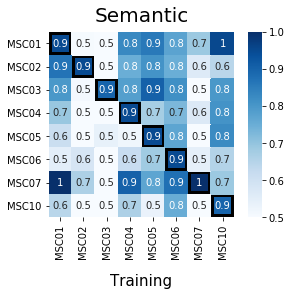

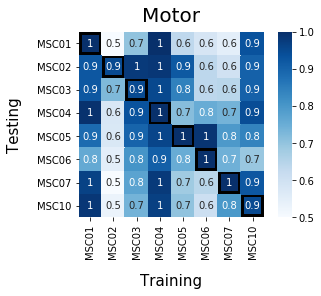

In [5]:


for task in taskList:
    #Same sub same task
    task_CV=grouped_CV.get_group(task)
    task_CV.drop(columns=['task'], inplace=True)
    task_CV['test_sub']=task_CV['sub']
    task_CV=task_CV.pivot(index='sub', columns='test_sub', values='acc')
    #Diff sub same task
    task_df=grouped_df.get_group(task)
    task_df.drop(columns=['task'], inplace=True)
    task_df=task_df.pivot(index='test_sub', columns='train_sub', values='acc')
    
    if task=='glass':
        plt.figure()
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1,cmap="Blues",fmt=".1g",square=True)
        ax.set_title('Coherence',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
        plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/glass_heatplots.png', bbox_inches='tight')
    elif task=='motor':
        plt.figure()
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",fmt=".1g",square=True)
        ax.set_title('Motor',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
        plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/motor_heatplots.png', bbox_inches='tight')
    elif task=='semantic':
        plt.figure()
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",fmt=".1g",square=True)
        ax.set_title('Semantic',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
        plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/semantic_heatplots.png', bbox_inches='tight')
    else:
        plt.figure()
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",fmt=".1g",square=True)
        ax.set_title('Memory',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
        plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/mem_heatplots.png', bbox_inches='tight')
        
        

In [2]:
pair_motor.set_index('sub',inplace=True)
pair_motor.drop(['MSC01','MSC02','MSC03','MSC06','MSC07','MSC10'],inplace=True)
pair_motor.reset_index(inplace=True)

pair_glass.set_index('sub',inplace=True)
pair_glass.drop(['MSC01','MSC02','MSC03','MSC06','MSC07','MSC10'],inplace=True)
pair_glass.reset_index(inplace=True)

pair_mem.set_index('sub',inplace=True)
pair_mem.drop(['MSC01','MSC02','MSC03','MSC06','MSC07','MSC10'],inplace=True)
pair_mem.reset_index(inplace=True)

pair_sem.set_index('sub',inplace=True)
pair_sem.drop(['MSC01','MSC02','MSC03','MSC06','MSC07','MSC10'],inplace=True)
pair_sem.reset_index(inplace=True)

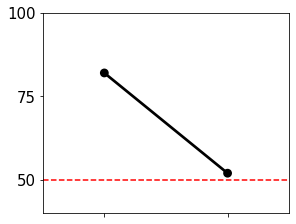

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
diag=pd.DataFrame()
diag['Analysis']=['Different Subject','Same Subject']
diag['acc']=[52, 82]
fig=plt.figure(figsize=(4,3), constrained_layout=True)
ax=sns.pointplot(x="Analysis",y="acc",ci=None, data=diag, color='black',order=['Same Subject','Different Subject'])#, color='r', palette=['4','5'])

ax.axhline(50, ls='--',color='r')

ax.set_ylim(40,100)

y=[50,75,100]
plt.yticks(y,fontsize=15)
plt.xlabel('')
plt.ylabel('')
plt.setp(ax.get_xticklabels(), visible=False)
plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/FigsFinal/CVDS_DIAGRAM_point_plots.png', bbox_inches='tight')


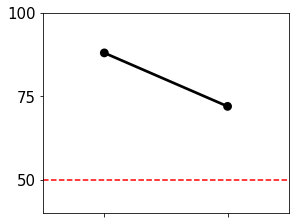

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
diag=pd.DataFrame()
diag['Analysis']=['Different Subject','Same Subject']
diag['acc']=[72, 88]
fig=plt.figure(figsize=(4,3), constrained_layout=True)
ax=sns.pointplot(x="Analysis",y="acc",ci=None, data=diag, color='black',order=['Same Subject','Different Subject'])#, color='r', palette=['4','5'])

ax.axhline(50, ls='--',color='r')

ax.set_ylim(40,100)

y=[50,75,100]
plt.yticks(y,fontsize=15)
plt.xlabel('')
plt.ylabel('')
plt.setp(ax.get_xticklabels(), visible=False)
plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/FigsFinal/SSBS_DIAGRAM_point_plots.png', bbox_inches='tight')


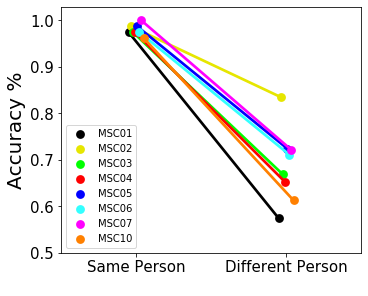

In [262]:
#poster fig
df=pd.read_csv(outDir+'ALL/acc.csv')
df_re=df.groupby(['train_sub']).mean()
df_re.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_re.reset_index(inplace=True)
res=pd.melt(df_re, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

fig=plt.figure(figsize=(5,4), constrained_layout=True)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=res, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
#ax.legend_.remove()
#ax.set_title('All Tasks', fontsize=20, pad=10)
ax.legend(title='',loc='lower left')
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=20)
plt.xlabel(' ')
ax.tick_params(labelsize=15)
plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/ALL_point_plots.png', bbox_inches='tight')


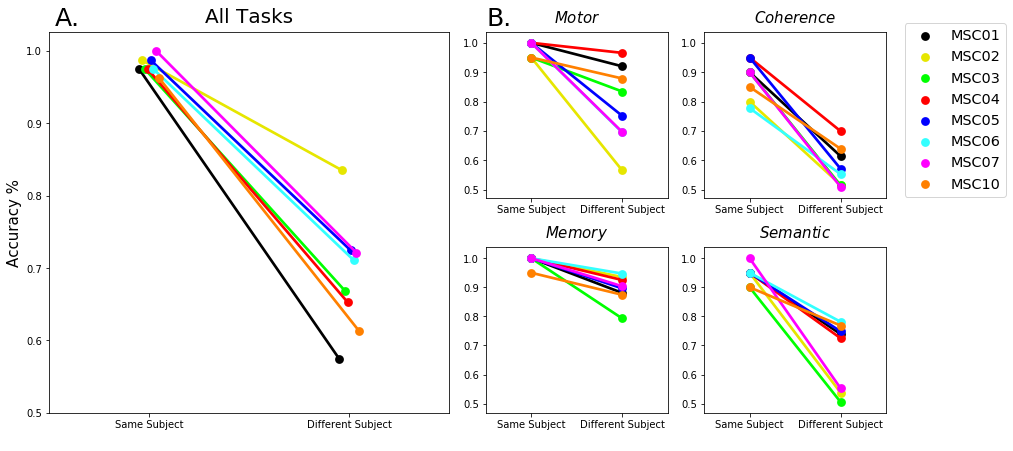

In [50]:
#reorganizing figure 1

#Same Task (Fig 1)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)

fig.text(.13, .893, 'A.',fontsize=25)
fig.text(.53, .893, 'B.',fontsize=25)
"""
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""

ax0=fig.add_subplot(gs[0:,:2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax0,ci=None, data=res, dodge=.1,order=['Same Subject','Different Subject'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Tasks', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')

#motor
ax1=fig.add_subplot(gs[0,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=15, pad=10)
plt.xlabel('')
plt.ylabel(' ')
#mixed
ax2=fig.add_subplot(gs[0,3],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_glass, ax=ax2, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[1,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=15, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')

ax4=fig.add_subplot(gs[1,3],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax4, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.legend(bbox_to_anchor=(1.7, 2.4),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')
plt.savefig(thisDir+'output/FigsFinal/ALL_CVDS_point_plots.png', bbox_inches='tight')










In [141]:
def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)


percentiles_manDays=sixty_res.groupby(['Days','Analysis']).agg({'acc': [p5, p95]})
percentiles_manDays.columns = percentiles_manDays.columns.droplevel()
percentiles_manDays.reset_index(inplace=True)

In [150]:
diff_percent=percentiles_manDays[percentiles_manDays.Analysis=='Different Person']
same_percent=percentiles_manDays[percentiles_manDays.Analysis=='Same Person']

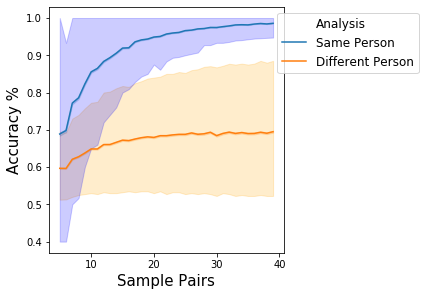

In [155]:
#reorganizing number of samples to include here in quantity section 
ax=sns.lineplot(x='Days', y='acc', hue='Analysis', data=sixty_res)
ax.fill_between(diff_percent['Days'],diff_percent['p5'],diff_percent['p95'],alpha=.2,color='orange')
ax.fill_between(same_percent['Days'],same_percent['p5'],same_percent['p95'],alpha=.2,color='blue')
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel("Sample Pairs", fontsize=15)
plt.legend(bbox_to_anchor=(1.6,1),loc='upper right',fontsize='large')
plt.savefig(thisDir+'output/FigsFinal/samplePairplots.png', bbox_inches='tight')



In [320]:
#group split (standard approach to machine learning and FC)
#within between training tasks only use one session with all subject one task 
CVGroup=pd.read_csv(thisDir+'output/results/groupAvg/acc.csv')
CV=pd.read_csv(outDir+'CV/stats.csv')
CV_Stand_app=CVGroup[['train_task','train_acc']]
CV_Stand_app.rename(columns={'train_task':'task','train_acc':'acc'},inplace=True)
CV.rename(columns={'Mean':'acc'},inplace=True)
CV.drop(columns={'Std'},inplace=True)
CV['Analysis']='Same Subject'
DS=pd.read_csv(outDir+'DS/stats.csv')
DS.rename(columns={'Mean':'acc'},inplace=True)
DS.drop(columns={'Std'},inplace=True)
DS['Analysis']='Different Subject'
CV_Stand_app['Analysis']='Groupwise Approach'
comp_CV=pd.concat([CV,CV_Stand_app, DS])

"""
#this involved using all the sessions leave one sub out training and testing tasks were also seperated 
dfGroup=pd.read_csv(thisDir+'output/results/groupAvg/allSess_acc.csv')
DS=pd.read_csv(outDir+'DS/stats.csv')
DS_Stand_app=dfGroup[['train_task','CV_acc']]
DS_Stand_app.rename(columns={'train_task':'task', 'CV_acc':'acc'},inplace=True)
DS.rename(columns={'Mean':'acc'},inplace=True)
DS.drop(columns={'Std'},inplace=True)
DS['Analysis']='Individualized Classifiers'
DS_Stand_app['Analysis']='Standard mL Approach'
comp_DS=pd.concat([DS, DS_Stand_app])

SS=pd.read_csv(outDir+'SS/stats.csv')
SS_Stand_app=dfGroup[['train_task','test_task','SS_acc']]
SS_Stand_app.rename(columns={'SS_acc':'acc'},inplace=True)
SS.drop(columns={'Unnamed: 0','Std'},inplace=True)
SS.rename(columns={'Mean':'acc'},inplace=True)
SS['Analysis']='Individualized'
SS_Stand_app['Analysis']='Standard mL'
comp_SS=pd.concat([SS,SS_Stand_app])



BS=pd.read_csv(outDir+'BS/stats.csv')
BS_Stand_app=dfGroup[['train_task','test_task','DS_acc']]
BS_Stand_app.rename(columns={'DS_acc':'acc'},inplace=True)
BS.drop(columns={'Unnamed: 0', 'Std'},inplace=True)
BS.rename(columns={'Mean':'acc'},inplace=True)
BS['Analysis']='Individualized'
BS_Stand_app['Analysis']='Standard mL'
comp_BS=pd.concat([BS,BS_Stand_app])
"""


#all task replication but using all sessions (40T 40R 7 subs) train one session all subs (24T 24R matched via split 6 subs)
#leave one subject out (all task 40 sample with 40 rest match) test one sub session 1 (4T 4R 1 sub)
allTask_CV=pd.read_csv(thisDir+'output/results/groupAvg/allTasks_acc.csv')



In [321]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='red', lw=4)]
ax=sns.pointplot(x='Analysis',y='acc',hue='task',data=comp_DS,palette=['red','blue','orange','green'])
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.36, 1),title='Training Task')
plt.ylabel("Accuracy %", fontsize=10)
plt.ylim(.5,1)
ax.set_title('Different Subject Same Task', fontsize=15, pad=10)

NameError: name 'comp_DS' is not defined

Text(0.5, 1.0, 'Semantic')

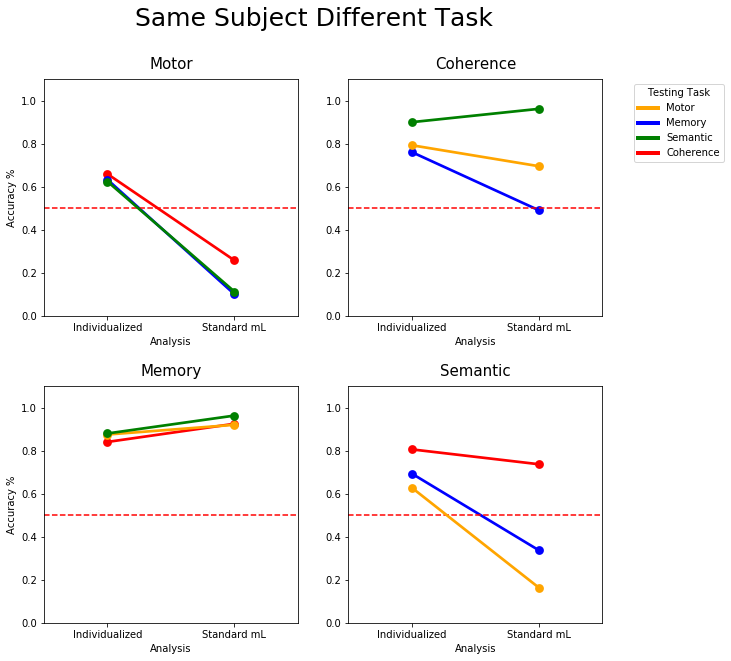

In [119]:
#Split up training task like your original figure for SS comparison
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
fig.suptitle('Same Subject Different Task', fontsize=25)
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x='Analysis',y='acc',hue='test_task',data=comp_SS[comp_SS.train_task=='motor'],palette=['red','blue','green'],ax=ax1)
ax.legend_.remove()
plt.ylim(0,1.1)
ax.axhline(.5, ls='--',color='r')
plt.ylabel("Accuracy %", fontsize=10)
ax.set_title('Motor', fontsize=15, pad=10)


ax2=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x='Analysis',y='acc',hue='test_task',data=comp_SS[comp_SS.train_task=='glass'],palette=['blue','orange','green'],ax=ax2)
ax.legend_.remove()
plt.ylim(0,1.1)
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.5, 1),title='Testing Task')
plt.ylabel(" ")
ax.axhline(.5, ls='--',color='r')
ax.set_title('Coherence', fontsize=15, pad=10)




ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x='Analysis',y='acc',hue='test_task',data=comp_SS[comp_SS.train_task=='mem'],palette=['red','orange','green'],ax=ax3)
ax.legend_.remove()
plt.ylim(0,1.1)
plt.ylabel("Accuracy %", fontsize=10)
ax.axhline(.5, ls='--',color='r')
ax.set_title('Memory', fontsize=15, pad=10)


ax4=fig.add_subplot(gs[1,1])
ax=sns.pointplot(x='Analysis',y='acc',hue='test_task',data=comp_SS[comp_SS.train_task=='semantic'],palette=['red','blue','orange'],ax=ax4)
ax.legend_.remove()
plt.ylim(0,1.1)
plt.ylabel(" ")
ax.axhline(.5, ls='--',color='r')
ax.set_title('Semantic', fontsize=15, pad=10)



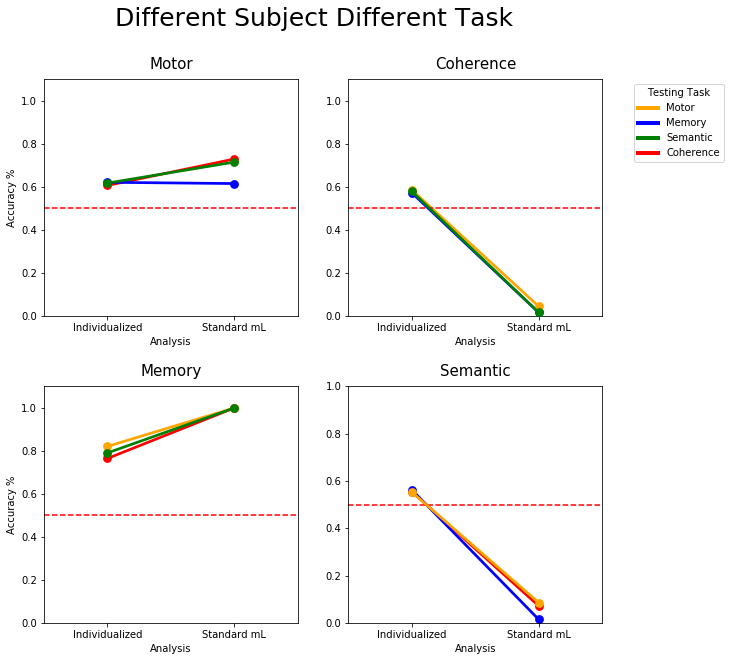

In [120]:
#Split up training task like your OG fig for BS comparison
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
fig.suptitle('Different Subject Different Task', fontsize=25)
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x='Analysis',y='acc',hue='test_task',data=comp_BS[comp_BS.train_task=='motor'],palette=['red','blue','green'],ax=ax1)
ax.legend_.remove()
plt.ylim(0,1.1)
plt.ylabel("Accuracy %", fontsize=10)
ax.set_title('Motor', fontsize=15, pad=10)
ax.axhline(.5, ls='--',color='r')

ax2=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x='Analysis',y='acc',hue='test_task',data=comp_BS[comp_BS.train_task=='glass'],palette=['blue','orange','green'],ax=ax2)
ax.legend_.remove()
plt.ylim(0,1.1)
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.5, 1),title='Testing Task')
plt.ylabel(" ")
ax.set_title('Coherence', fontsize=15, pad=10)
ax.axhline(.5, ls='--',color='r')



ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x='Analysis',y='acc',hue='test_task',data=comp_BS[comp_BS.train_task=='mem'],palette=['red','orange','green'],ax=ax3)
ax.legend_.remove()
plt.ylim(0,1.1)
plt.ylabel("Accuracy %", fontsize=10)
ax.set_title('Memory', fontsize=15, pad=10)
ax.axhline(.5, ls='--',color='r')

ax4=fig.add_subplot(gs[1,1])
ax=sns.pointplot(x='Analysis',y='acc',hue='test_task',data=comp_BS[comp_BS.train_task=='semantic'],palette=['red','blue','orange'],ax=ax4)
ax.legend_.remove()
plt.ylim(0,1.0)
plt.ylabel(" ")
ax.set_title('Semantic', fontsize=15, pad=10)
ax.axhline(.5, ls='--',color='r')


In [316]:
mL_mean

acc_per_sess    0.5
dtype: float64

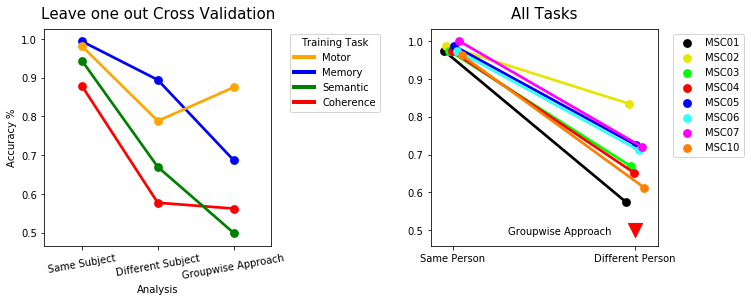

In [323]:
fig=plt.figure(figsize=(11,4))#, constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.7, hspace=0.0)

ax1=fig.add_subplot(gs[0,0])
#Split up 7 x 58760 splitting up sessions so all subjects session 1 data trained leave out one subject 1 sess test on new task 7 subjects 1 session 
ax=sns.pointplot(x='Analysis',y='acc',hue='task',data=comp_CV,order=['Same Subject','Different Subject','Groupwise Approach'],palette=['red','blue','orange','green'],ax=ax1)
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.5, 1),title='Training Task')
plt.ylabel("Accuracy %", fontsize=10)
plt.xticks(rotation=10)
ax.set_title('Leave one out Cross Validation', fontsize=15, pad=10)


ax2=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ci=None, data=res, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'],ax=ax2)
plt.legend(bbox_to_anchor=(1.4, 1),fontsize='medium')
plt.scatter(x=1,y=mL_mean,s=200,color='r',marker="v")
ax.set_title('All Tasks', fontsize=15, pad=10)
ax.text(.3,.49, 'Groupwise Approach')
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("")
plt.xlabel(' ')

plt.savefig(thisDir+'output/FigsFinal/groupwise_mL_compPlot.png', bbox_inches='tight')


In [324]:
res

,train_sub,Analysis,acc
0,MSC01,Same Person,0.975000
1,MSC02,Same Person,0.987500
2,MSC03,Same Person,0.975000
3,MSC04,Same Person,0.975000
4,MSC05,Same Person,0.987500
5,MSC06,Same Person,0.975000
6,MSC07,Same Person,1.000000
7,MSC10,Same Person,0.962500
8,MSC01,Different Person,0.574388
9,MSC02,Different Person,0.835051


In [139]:
#rand_CV.groupby('features').agg(lambda x: np.percentile(x['acc'], q = 5))
# 50th Percentile
def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)

percentiles_CV=rand_CV.groupby(['features']).agg({'acc': [p5, p95]})
percentiles_CV.columns = percentiles_CV.columns.droplevel()
percentiles_CV.reset_index(inplace=True)

percentiles_DS=rand_DS.groupby(['features']).agg({'acc': [p5, p95]})
percentiles_DS.columns = percentiles_DS.columns.droplevel()
percentiles_DS.reset_index(inplace=True)


percentiles_SS=rand_SS.groupby(['features']).agg({'acc': [p5, p95]})
percentiles_SS.columns = percentiles_SS.columns.droplevel()
percentiles_SS.reset_index(inplace=True)

percentiles_BS=rand_BS.groupby(['features']).agg({'acc': [p5, p95]})
percentiles_BS.columns = percentiles_BS.columns.droplevel()
percentiles_BS.reset_index(inplace=True)


NameError: name 'rand_CV' is not defined

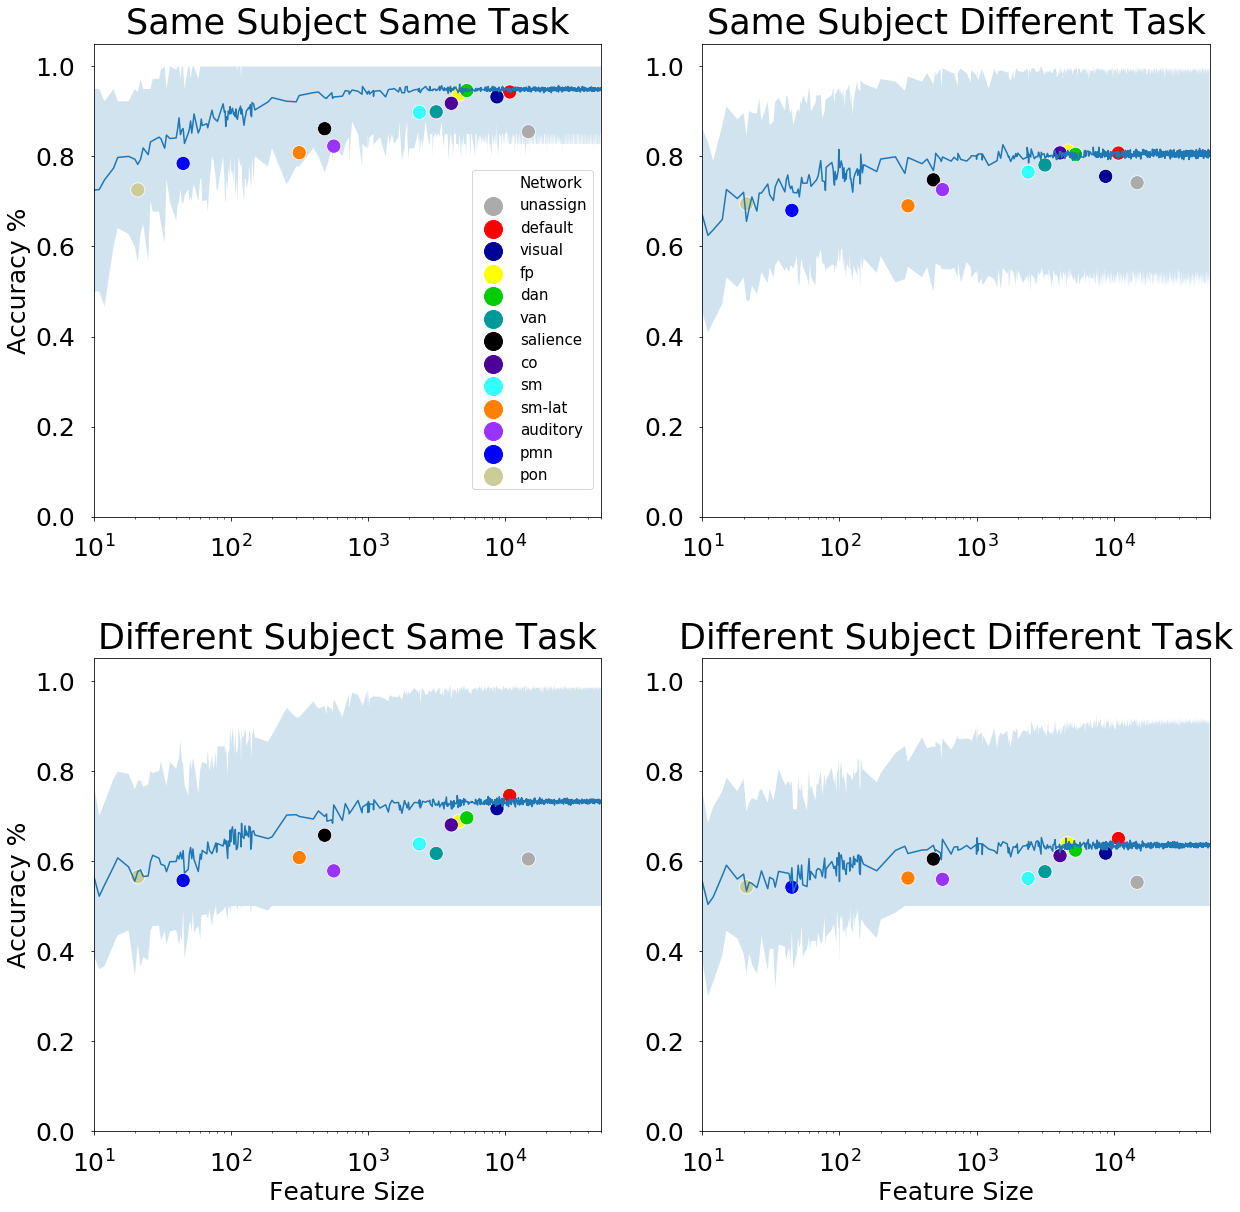

In [137]:
#feature overlay for poster
#Feature selection compared to null (Fig 7)
fig=plt.figure(figsize=(20,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)

#CV
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="features", y='acc',ci=None,data=rand_CV, ax=ax1)
ax.fill_between(percentiles_CV['features'],percentiles_CV['p5'],percentiles_CV['p95'],alpha=.2)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=CV_z, ax=ax1, color='r',s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Subject Same Task',fontsize=35, pad=10)
ax.set_ylabel("Accuracy %", fontsize=25)
ax.set_xlabel('')
ax.set(ylim=(0, 1.05),xlim=(10,50000))
ax.tick_params(labelsize=25,pad=15)
plt.legend(markerscale=3, bbox_to_anchor=(1, .75),fontsize=15)
#DS
ax2=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="features", y='acc',ci=None,data=rand_DS, ax=ax2)
ax.fill_between(percentiles_DS['features'],percentiles_DS['p5'],percentiles_DS['p95'],alpha=.2)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=DS_z, ax=ax2, color='r',legend=False,s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Same Task',fontsize=35, pad=10)
ax.set_ylabel("Accuracy %", fontsize=25)
plt.xlabel('Feature Size',fontsize=25)
ax.set(ylim=(0, 1.05),xlim=(10,50000))
ax.tick_params(labelsize=25,pad=15)

#SS
ax3=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="features", y='acc',ci=None,data=rand_SS, ax=ax3)
ax.fill_between(percentiles_SS['features'],percentiles_SS['p5'],percentiles_SS['p95'],alpha=.2)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=SS_z, ax=ax3, color='r',legend=False,s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Subject Different Task',fontsize=35, pad=10)
ax.set_ylabel('')
ax.set_xlabel(' ')
ax.set(ylim=(0, 1.05),xlim=(10,50000))
ax.tick_params(labelsize=25,pad=15)

#BS
ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="features", y='acc',ci=None,data=rand_BS, ax=ax4)
ax.fill_between(percentiles_BS['features'],percentiles_BS['p5'],percentiles_BS['p95'],alpha=.2)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=BS_z, ax=ax4, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Different Task',fontsize=35, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size',fontsize=25)
ax.set(ylim=(0, 1.05),xlim=(10,50000))
ax.tick_params(labelsize=25,pad=15)





plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/feature_plots.png', bbox_inches='tight')




In [132]:
#plotting within/between performance back on FC 
crossNet=thisDir + 'output/results/wtn_btw_netSelection/'
PCA=thisDir+'output/results/acc/ALL/pca50_acc.csv'
ALL=thisDir+'output/results/acc/ALL/shufflekFold_acc.csv'
PCA20=thisDir+'output/results/acc/ALL/pca20_acc.csv'
PCA05=thisDir+'output/results/acc/ALL/pca05_acc.csv'
PCA_varChange=pd.read_csv(thisDir+'output/results/acc/ALL/pcaVarChange_acc.csv')
wtn=pd.read_csv(crossNet+'wtn_acc.csv')
btw=pd.read_csv(crossNet+'btw_acc.csv')
ALL=pd.read_csv(ALL)

groupwise=thisDir+'output/results/groupAvg/allTasks_acc.csv'
groupAvg=pd.read_csv(groupwise)
"""
df_all=ALL.groupby(['train_sub']).mean()
df_all.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_all.reset_index(inplace=True)
ALL=pd.melt(df_all, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
"""
#plotting PCA analysis 
#50% variance explained
PCA=pd.read_csv(PCA)
df_pca=PCA.groupby(['train_sub']).mean()
df_pca.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_pca.reset_index(inplace=True)
PCA50=pd.melt(df_pca, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
#20% variance explained
PCA20=pd.read_csv(PCA20)
df_pca20=PCA20.groupby(['train_sub']).mean()
df_pca20.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_pca20.reset_index(inplace=True)
PCA20=pd.melt(df_pca20, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
#5% variance explained
PCA05=pd.read_csv(PCA05)
df_pca05=PCA05.groupby(['train_sub']).mean()
df_pca05.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_pca05.reset_index(inplace=True)
PCA05=pd.melt(df_pca05, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

#btw
df_btw=btw.groupby(['train_sub']).mean()
df_btw.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_btw.reset_index(inplace=True)
btw=pd.melt(df_btw, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
#wtn
df_wtn=wtn.groupby(['train_sub']).mean()
df_wtn.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_wtn.reset_index(inplace=True)
wtn=pd.melt(df_wtn, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

In [136]:
PCA_varChange
df_pcavar=PCA_varChange.groupby(['train_sub','var']).mean()
df_pcavar.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_pcavar.reset_index(inplace=True)
PCAvar=pd.melt(df_pcavar, id_vars=['train_sub','var'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')


In [158]:
#d={'Analysis':['Different Person'],'acc':mL_mean}
#mL_df=pd.DataFrame(d)
#mL_mean=groupAvg.mean()
PCAvar80=PCAvar[PCAvar['var']==.8]

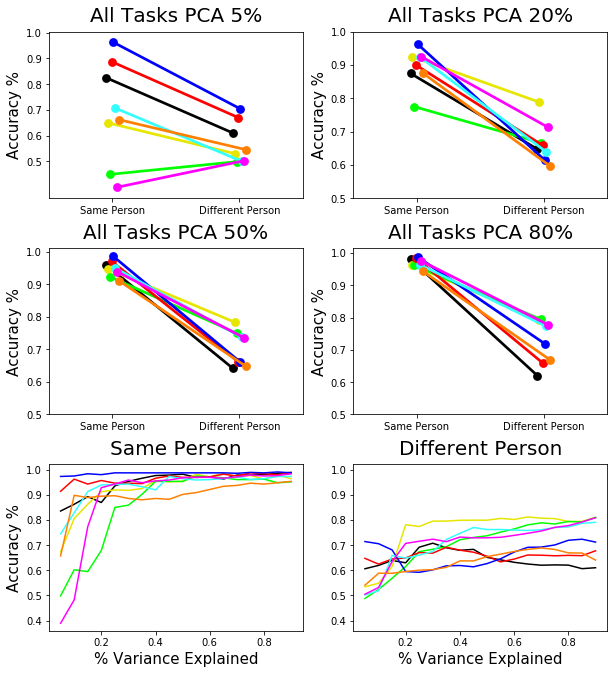

In [160]:
fig=plt.figure(figsize=(10,15), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=4, ncols=2,wspace=.2,hspace=.3)
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax1,ci=None, data=PCA20, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.set_title('All Tasks PCA 20%', fontsize=20, pad=10)
plt.xlabel(' ')
ax.legend_.remove()
#plt.scatter(x=1,y=mL_mean,s=200,color='r',marker="v")
#ax.text(.3,.49, 'Groupwise Approach')

ax2=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ax=ax2,ci=None, data=PCA50, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Tasks PCA 50%', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')
#plt.legend(loc='lower left',fontsize='large')

ax3=fig.add_subplot(gs[1,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ax=ax3,ci=None, data=PCAvar80, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Tasks PCA 80%', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')

ax5=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax5,ci=None, data=PCA05, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.set_title('All Tasks PCA 5%', fontsize=20, pad=10)
plt.xlabel(' ')
ax.legend_.remove()



ax6=fig.add_subplot(gs[2,0])
ax = sns.lineplot(x="var", y='cv_acc',hue='train_sub',ci=None,data=PCA_varChange, ax=ax6,color='r',legend=False,palette=['1','2','3','4','5','6','7','10'])
plt.xlabel("% Variance Explained", fontsize=15)
plt.ylabel("Accuracy %", fontsize=15)
ax.set_title('Same Person', fontsize=20, pad=10)

ax7=fig.add_subplot(gs[2,1],sharey=ax6)
ax = sns.lineplot(x="var", y='acc',hue='train_sub',ci=None,data=PCA_varChange, ax=ax7,color='r',legend=False,palette=['1','2','3','4','5','6','7','10'])
plt.xlabel("% Variance Explained", fontsize=15)
plt.ylabel(" ", fontsize=15)
ax.set_title('Different Person', fontsize=20, pad=10)
plt.savefig(thisDir+'output/FigsFinal/pca_indNet_compPlot.png', bbox_inches='tight')



In [ ]:
train 80% same sub
test 20% same sub
test 20% diff sub

#test 100% diff sub 

In [21]:
PCA[(PCA['Analysis']=='Different Subject')].mean()

acc    0.690236
dtype: float64

In [22]:
res[(res['Analysis']=='Different Subject')].mean()

acc    0.687468
dtype: float64

In [23]:
res[(res['Analysis']=='Same Subject')].mean()

acc    0.979687
dtype: float64

In [35]:
wtn[(wtn['Analysis']=='Same Subject')].mean()

acc    0.971652
dtype: float64

In [36]:
wtn[(wtn['Analysis']=='Different Subject')].mean()

acc    0.647302
dtype: float64

In [37]:
btw[(btw['Analysis']=='Same Subject')].mean()

acc    0.976562
dtype: float64

In [38]:
btw[(btw['Analysis']=='Different Subject')].mean()

acc    0.675976
dtype: float64

In [328]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, '/Users/Alexis/Desktop/MSC_Alexis/analysis/code/mL_rsfMRI/Predictions')
import reshape
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
import seaborn as sns
%matplotlib inline
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
Parcel_params = reshape.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
roi_sort = np.squeeze(Parcel_params['roi_sort'])
#plotting kfold results network to network analysis 
net2net=pd.read_csv(thisDir+'output/results/acc/ALL/Net2Net_acc.csv')
subnet=pd.read_csv(thisDir+'output/results/acc/ALL/subNetwork_acc.csv')
finalNet=pd.concat([net2net, subnet])
finalNet.drop(columns={'Unnamed: 0'},inplace=True)




#Lets average all subs 
sameSub=finalNet[(finalNet['Analysis']=='Same Subject')]
diffSub=finalNet[(finalNet['Analysis']=='Different Subject')]
sameSub_all=sameSub.groupby(['Network_A','Network_B']).mean().reset_index()
diffSub_all=diffSub.groupby(['Network_A','Network_B']).mean().reset_index()

sameSub_all_pivot=sameSub_all.pivot(index='Network_A',columns='Network_B',values='acc')
sameSub_all_pivot=sameSub_all_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
sameSub_all_pivot=sameSub_all_pivot.reset_index()
sameSub_all_pivot=sameSub_all_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
sameSub_all_pivot.set_index('Network_A',inplace=True)

diffSub_all_pivot=diffSub_all.pivot(index='Network_A',columns='Network_B',values='acc')
diffSub_all_pivot=diffSub_all_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
diffSub_all_pivot=diffSub_all_pivot.reset_index()
diffSub_all_pivot=diffSub_all_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
diffSub_all_pivot.set_index('Network_A',inplace=True)

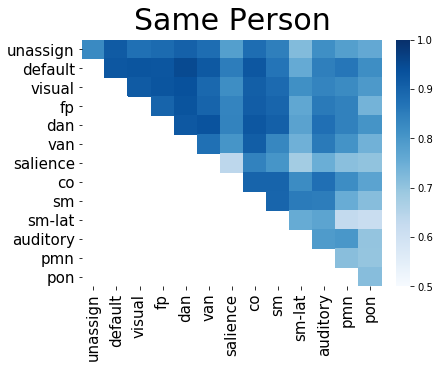

In [332]:
fig=plt.figure(figsize=(6,5))#, constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.7, hspace=0.0)

#ax1=fig.add_subplot(gs[0,0])
ax=sns.heatmap(sameSub_all_pivot,cmap='Blues',vmin=.5,vmax=1)#,ax=ax1)
ax.set_title('Same Person',fontsize=30, pad=10)
ax.set_xlabel('')
ax.set_ylabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

"""
#ax2=fig.add_subplot(gs[0,1])
ax=sns.heatmap(diffSub_all_pivot,cmap='Blues',vmin=.5,vmax=1)#,ax=ax2)
ax.set_title('Different Person',fontsize=30, pad=10)
ax.set_xlabel('')
ax.set_ylabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
"""
plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/SSfeature_plots.png', bbox_inches='tight')

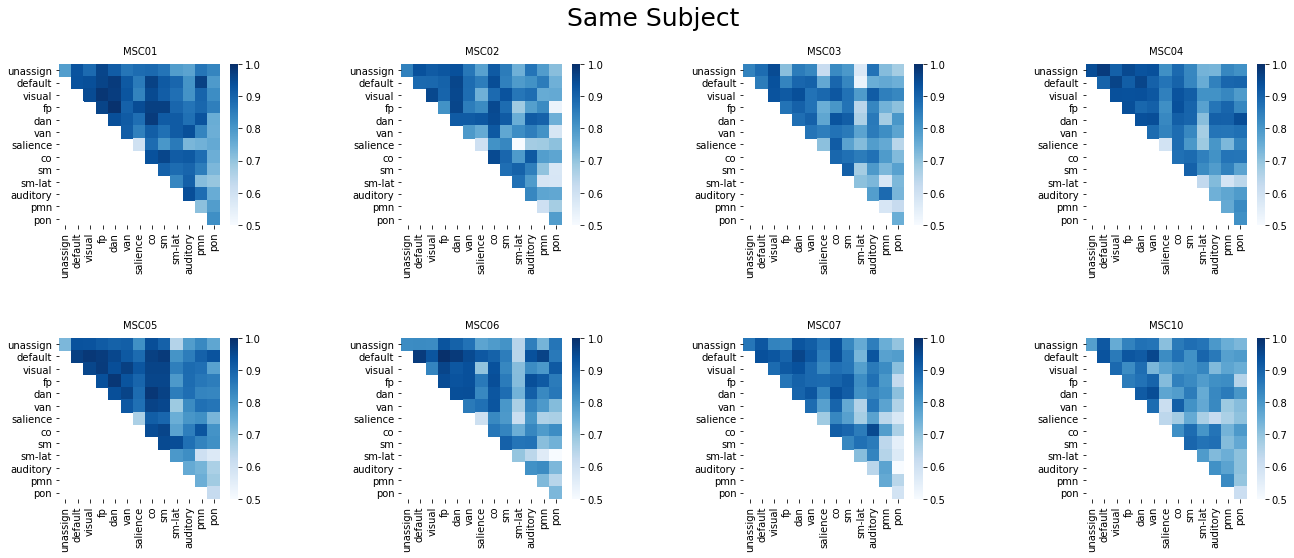

In [330]:
#plot all for same sub 
fig=plt.figure(figsize=(22,8))
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=0.7, hspace=0.7)
position=0
fig.suptitle('Same Subject', fontsize=25)
for i in subList:
    tmp=sameSub[(sameSub['train_sub']==i)]
    tmp.drop(columns={'train_sub','Analysis'},inplace=True)
    tmp_pivot=tmp.pivot(index='Network_A',columns='Network_B',values='acc')
    tmp_pivot=tmp_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
    tmp_pivot=tmp_pivot.reset_index()
    tmp_pivot=tmp_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
    tmp_pivot.set_index('Network_A',inplace=True)
    if position<4:
        ax1=fig.add_subplot(gs[0,position])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax1)
        ax.set_title(i,fontsize=10, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        spot=position-4
        ax2=fig.add_subplot(gs[1,spot])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax2)
        ax.set_title(i,fontsize=10, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    position=position+1
    
plt.savefig(thisDir+'output/FigsFinal/net2net_wtn_Plot.png', bbox_inches='tight')


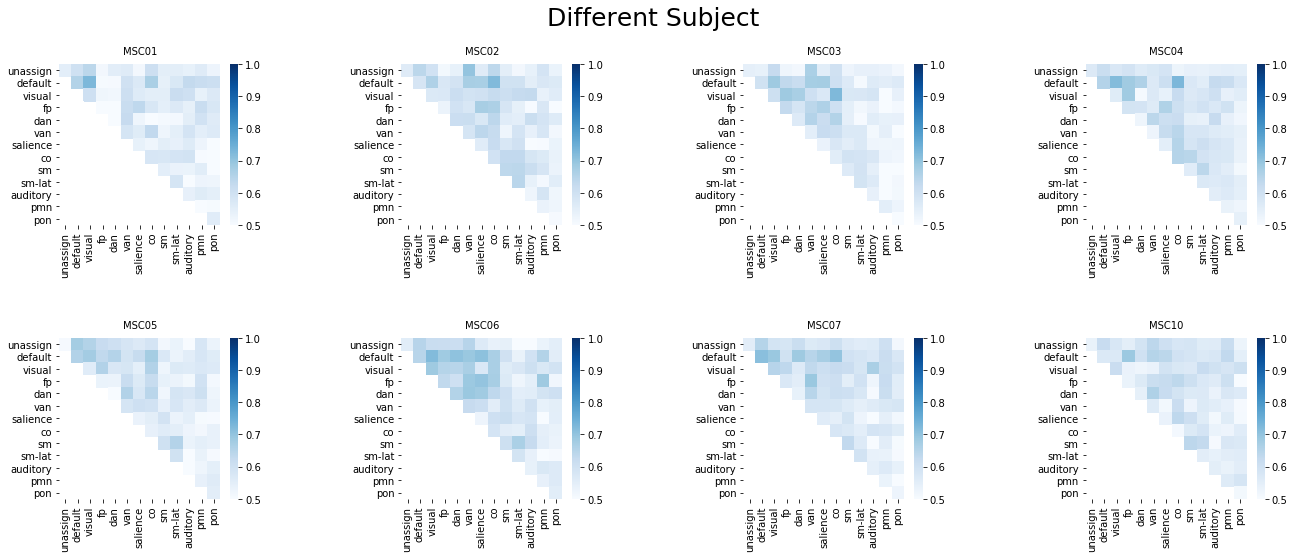

In [333]:
#plot all for diff sub 
fig=plt.figure(figsize=(22,8))
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=0.7, hspace=0.7)
position=0
fig.suptitle('Different Subject', fontsize=25)
for i in subList:
    tmp=diffSub[(diffSub['train_sub']==i)]
    tmp.drop(columns={'train_sub','Analysis'},inplace=True)
    tmp_pivot=tmp.pivot(index='Network_A',columns='Network_B',values='acc')
    tmp_pivot=tmp_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
    tmp_pivot=tmp_pivot.reset_index()
    tmp_pivot=tmp_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
    tmp_pivot.set_index('Network_A',inplace=True)
    if position<4:
        ax1=fig.add_subplot(gs[0,position])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax1)
        ax.set_title(i,fontsize=10, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        spot=position-4
        ax2=fig.add_subplot(gs[1,spot])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax2)
        ax.set_title(i,fontsize=10, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    position=position+1
    
    
plt.savefig(thisDir+'output/FigsFinal/net2net_btw_Plot.png', bbox_inches='tight')


In [201]:
group=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/GroupNet/acc.csv')
ind=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/IndNet/acc.csv')



df_group=group.groupby(['train_sub']).mean()
df_group.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_group.reset_index(inplace=True)
group=pd.melt(df_group, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')


df_ind=ind.groupby(['train_sub']).mean()
df_ind.rename(columns={'cv_acc':'Same Subject','acc':'Different Person'},inplace=True)
df_ind.reset_index(inplace=True)
ind=pd.melt(df_ind, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')


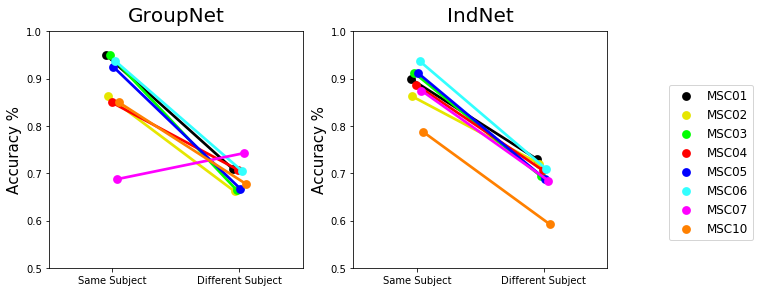

In [202]:
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax1,ci=None, data=group, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.set_title('Group Parcellation', fontsize=15, pad=10)
plt.xlabel(' ')
ax.legend_.remove()

ax2=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ax=ax2,ci=None, data=ind, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Individual Parcellation', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel(" ", fontsize=15)
plt.xlabel(' ')
plt.legend(bbox_to_anchor=(1.6, .8),loc='upper right',fontsize='large')
plt.savefig(thisDir+'output/FigsFinal/indGroupNet_Plot.png', bbox_inches='tight')

In [165]:



SSdfFinal=pd.read_csv(thisDir+'output/results/permutation/ALL/shuffle_ROIacc.csv')


null=pd.read_csv(thisDir+'output/results/permutation/ALL/null_ROIacc.csv')



In [166]:
MSC01=SSdfFinal[SSdfFinal['train']=='MSC01']
MSC02=SSdfFinal[SSdfFinal['train']=='MSC02']
MSC03=SSdfFinal[SSdfFinal['train']=='MSC03']
MSC04=SSdfFinal[SSdfFinal['train']=='MSC04']
MSC05=SSdfFinal[SSdfFinal['train']=='MSC05']
MSC06=SSdfFinal[SSdfFinal['train']=='MSC06']
MSC07=SSdfFinal[SSdfFinal['train']=='MSC07']
MSC10=SSdfFinal[SSdfFinal['train']=='MSC10']

MSC01_null=null[null['train']=='MSC01']
MSC02_null=null[null['train']=='MSC02']
MSC03_null=null[null['train']=='MSC03']
MSC04_null=null[null['train']=='MSC04']
MSC05_null=null[null['train']=='MSC05']
MSC06_null=null[null['train']=='MSC06']
MSC07_null=null[null['train']=='MSC07']
MSC10_null=null[null['train']=='MSC10']

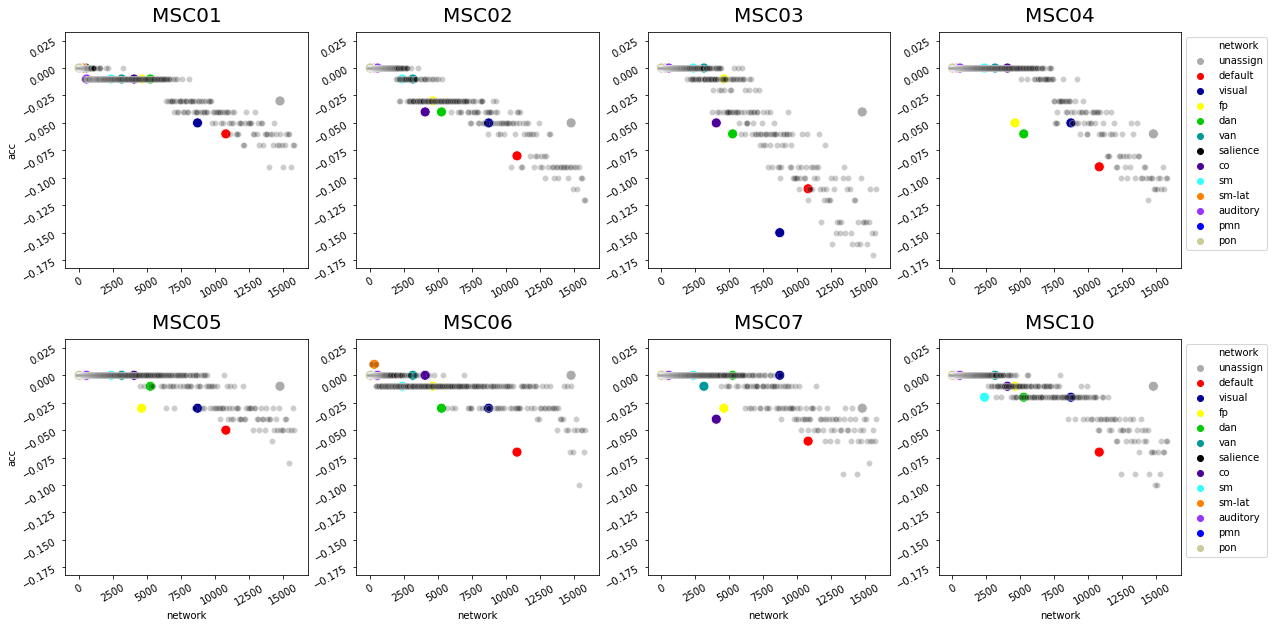

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=4,wspace=.2,hspace=.3)
ax0=fig.add_subplot(gs[0,0])
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC01,ax=ax0, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc',alpha=.2, data=MSC01_null,color='black',ax=ax0)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
#ax.axhline(0, ls='--')
ax.set_title('MSC01', fontsize=20, pad=10)
plt.xlabel(' ')
ax1=fig.add_subplot(gs[0,1],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC02,ax=ax1, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC02_null,color='black',alpha=.2,ax=ax1)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
#ax.axhline(0, ls='--')
ax.set_title('MSC02', fontsize=20, pad=10)
plt.xlabel(' ')
plt.ylabel(' ')
ax2=fig.add_subplot(gs[0,2],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC03,ax=ax2, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC03_null,color='black',alpha=.2,ax=ax2)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
#ax.axhline(0, ls='--')
ax.set_title('MSC03', fontsize=20, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')
ax3=fig.add_subplot(gs[0,3],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC04,ax=ax3, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC04_null,color='black',alpha=.2,ax=ax3)
ax.tick_params(labelsize=10,rotation=30)
plt.legend(bbox_to_anchor=(1, 1.0))
ax.set_title('MSC04', fontsize=20, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')

ax4=fig.add_subplot(gs[1,0],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC05,ax=ax4, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC05_null,color='black',alpha=.2,ax=ax4)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
ax.set_title('MSC05', fontsize=20, pad=10)

ax5=fig.add_subplot(gs[1,1],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC06,ax=ax5, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC06_null,color='black',alpha=.2,ax=ax5)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
ax.set_title('MSC06', fontsize=20, pad=10)
plt.ylabel(' ')
ax6=fig.add_subplot(gs[1,2],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC07,ax=ax6, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC07_null,color='black',alpha=.2,ax=ax6)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
ax.set_title('MSC07', fontsize=20, pad=10)
plt.ylabel(' ')


ax7=fig.add_subplot(gs[1,3],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC10,ax=ax7, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC10_null,color='black',alpha=.2,ax=ax7)
ax.tick_params(labelsize=10,rotation=30)
plt.legend(bbox_to_anchor=(1, 1.0))
ax.set_title('MSC10', fontsize=20, pad=10)
plt.ylabel(' ')
plt.savefig(thisDir+'output/FigsFinal/permNets_hue_Plot.png', bbox_inches='tight')

In [123]:
rand_DS=pd.read_csv(randDir+'DS/acc.csv')
rand_DS['round']=rand_DS['features'].round(-1)
rand_SS=pd.read_csv(randDir+'SS/acc.csv')
rand_SS['round']=rand_SS['features'].round(-1)
rand_BS=pd.read_csv(randDir+'BS/acc.csv')
rand_BS['round']=rand_BS['features'].round(-1)
rand_CV=pd.read_csv(randDir+'CV/acc.csv')
rand_CV['round']=rand_CV['features'].round(-1)
rand_ALL=pd.read_csv(randDir+'ALL/acc.csv')
def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)

percentiles_CV=rand_CV.groupby(['round','task']).agg({'acc': [p5, p95]})
percentiles_CV.columns = percentiles_CV.columns.droplevel()
percentiles_CV.reset_index(inplace=True)

percentiles_DS=rand_DS.groupby(['round','task']).agg({'acc': [p5, p95]})
percentiles_DS.columns = percentiles_DS.columns.droplevel()
percentiles_DS.reset_index(inplace=True)


percentiles_SS=rand_SS.groupby(['round','train_task']).agg({'acc': [p5, p95]})
percentiles_SS.columns = percentiles_SS.columns.droplevel()
percentiles_SS.reset_index(inplace=True)

percentiles_BS=rand_BS.groupby(['round','train_task']).agg({'acc': [p5, p95]})
percentiles_BS.columns = percentiles_BS.columns.droplevel()
percentiles_BS.reset_index(inplace=True)


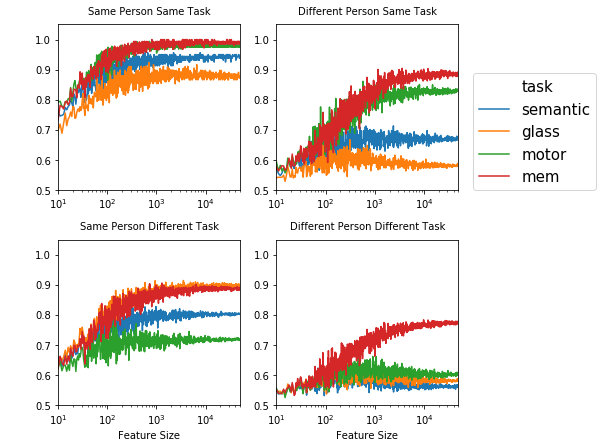

In [77]:
#Feature selection compared to null (Fig 5)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)
#CV
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="features", y='acc',hue='task',ci=None,data=rand_CV, ax=ax1)
#ax.fill_between(percentiles_CV['round'],percentiles_CV['p5'],percentiles_CV['p95'],alpha=.2)
ax.set(xscale="log")

#CV_z.rename(columns={'network':'Network'},inplace=True)
#g=sns.scatterplot(x='feature', y='acc', hue='Network', data=CV_z, ax=ax1, color='r',s=100,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
ax.set_xlabel('')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
plt.legend(title=None,markerscale=1, bbox_to_anchor=(3, .75),fontsize=15)
#DS
ax2=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="features", y='acc',hue='task',ci=None,data=rand_DS, ax=ax2)
#ax.fill_between(percentiles_DS['round'],percentiles_DS['p5'],percentiles_DS['p95'],alpha=.2)
ax.set(xscale="log")
#g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z, ax=ax2, color='r',legend=False,s=100,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
plt.xlabel('',fontsize=25)
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
ax.legend_.remove()
#SS
ax3=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="features", y='acc',hue='train_task',ci=None,data=rand_SS, ax=ax3)
#ax.fill_between(percentiles_SS['round'],percentiles_SS['p5'],percentiles_SS['p95'],alpha=.2)
ax.set(xscale="log")
#g=sns.scatterplot(x='feature', y='acc', hue='network', data=SS_z, ax=ax3, color='r',legend=False,s=100,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
ax.legend_.remove()
#BS
ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="features", y='acc',hue='train_task',ci=None,data=rand_BS, ax=ax4)
#ax.fill_between(percentiles_BS['round'],percentiles_BS['p5'],percentiles_BS['p95'],alpha=.2)
ax.set(xscale="log")
#g=sns.scatterplot(x='feature', y='acc', hue='network', data=BS_z, ax=ax4, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
ax.legend_.remove()
plt.savefig(thisDir+'output/FigsFinal/featureTask_Plot.png', bbox_inches='tight')

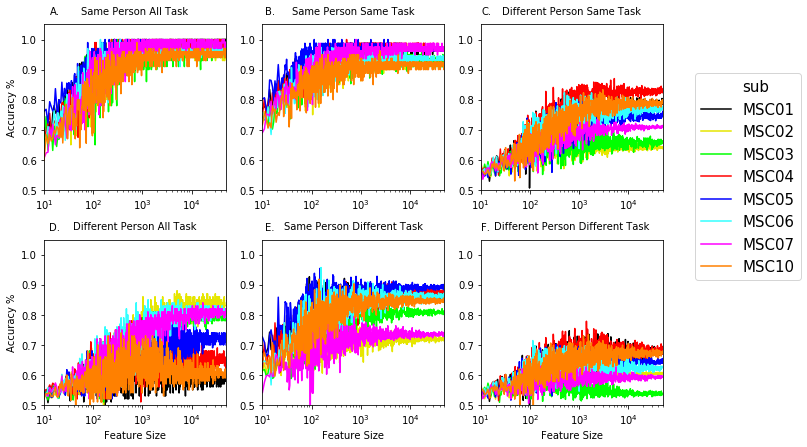

In [127]:
#Feature selection compared to null (Fig 5)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)
fig.text(.13, .9, 'A.',fontsize=10)
fig.text(.33, .9, 'B.',fontsize=10)
fig.text(.53, .9, 'C.',fontsize=10)
fig.text(.13, .472, 'D.',fontsize=10)
fig.text(.33, .472, 'E.',fontsize=10)
fig.text(.53, .472, 'F.',fontsize=10)
#ALL
ax0=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="feat", y='same_sub',hue='train',data=rand_ALL, ci=None, ax=ax0, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
plt.xlabel('')
ax.set_ylabel("Accuracy %")
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.set_title('Same Person All Task',fontsize=10, pad=10)
ax.legend_.remove()
ax00=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="feat", y='diff_sub',hue='train',data=rand_ALL, ci=None,ax=ax00, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Different Person All Task',fontsize=10, pad=10)
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.set_ylabel("Accuracy %")
ax.set(xscale="log")
plt.xlabel('Feature Size')
ax.legend_.remove()
#CV
ax1=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="features", y='acc',hue='sub',ci=None,data=rand_CV, ax=ax1, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
ax.set_title('Same Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
ax.set_xlabel('')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
plt.legend(title=None,markerscale=1, bbox_to_anchor=(3, .75),fontsize=15)
#DS
ax2=fig.add_subplot(gs[0,2])
ax = sns.lineplot(x="features", y='acc',hue='train_sub',ci=None,data=rand_DS, ax=ax2, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
ax.set_title('Different Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
plt.xlabel('',fontsize=25)
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.legend_.remove()

#SS
ax3=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="features", y='acc',hue='sub',ci=None,data=rand_SS, ax=ax3, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
ax.set_title('Same Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.legend_.remove()

#BS
ax4=fig.add_subplot(gs[1,2])
ax = sns.lineplot(x="features", y='acc',hue='train_sub',ci=None,data=rand_BS, ax=ax4, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
ax.set_title('Different Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.legend_.remove()




plt.savefig(thisDir+'output/FigsFinal/featuresub_Plot.png', bbox_inches='tight')





In [92]:
rand_ALL

,train,same_sub,diff_sub,feat
0,MSC01,0.60,0.51,10
1,MSC02,0.68,0.47,10
2,MSC03,0.66,0.54,10
3,MSC04,0.69,0.47,10
4,MSC05,0.81,0.52,10
...,...,...,...,...
7995,MSC04,0.97,0.64,50118
7996,MSC05,0.99,0.70,50118
7997,MSC06,0.96,0.82,50118
7998,MSC07,0.99,0.82,50118


In [25]:
allres=pd.read_csv(outDir+'ALL/separate_acc.csv')
DS=pd.read_csv(outDir+'DS/separate_acc.csv')
SS=pd.read_csv(outDir+'SS/separate_acc.csv')
BS=pd.read_csv(outDir+'BS/separate_acc.csv')


In [26]:
allres

,train,same_subT,diff_subT,same_subR,diff_subR
0,MSC01,1.000,0.996364,1.000000,0.151071
1,MSC02,1.000,0.953091,0.975000,0.752500
2,MSC03,1.000,0.860560,0.937500,0.767411
3,MSC04,1.000,1.000000,0.975000,0.304286
4,MSC05,1.000,0.956364,0.975000,0.504286
5,MSC06,1.000,0.941436,0.944444,0.719048
6,MSC07,1.000,0.889694,0.972222,0.748810
7,MSC10,0.975,0.996364,0.950000,0.197500


In [27]:
DS

,train,task,same_subT,same_subR,diff_subT,diff_subR
0,MSC01,semantic,0.900000,1.0,0.481429,0.997143
1,MSC02,semantic,0.900000,1.0,0.077143,0.998571
2,MSC03,semantic,0.800000,1.0,0.011429,1.000000
3,MSC04,semantic,0.900000,1.0,0.450000,1.000000
4,MSC05,semantic,0.900000,1.0,0.497143,1.000000
5,MSC06,semantic,0.900000,1.0,0.571429,0.991429
6,MSC07,semantic,1.000000,1.0,0.105714,1.000000
7,MSC10,semantic,0.800000,1.0,0.538571,0.998571
8,MSC01,glass,0.800000,1.0,0.231884,1.000000
9,MSC02,glass,0.600000,1.0,0.034783,1.000000


In [28]:
SS

,train,task,same_subT,same_subR,diffT
0,MSC01,semantic,0.900000,1.0,0.493333
1,MSC02,semantic,0.900000,1.0,0.096667
2,MSC03,semantic,0.800000,1.0,0.346429
3,MSC04,semantic,0.900000,1.0,0.373333
4,MSC05,semantic,0.900000,1.0,0.633333
5,MSC06,semantic,0.900000,1.0,0.500000
6,MSC07,semantic,1.000000,1.0,0.382759
7,MSC10,semantic,0.800000,1.0,0.583333
8,MSC01,glass,0.800000,1.0,0.740000
9,MSC02,glass,0.600000,1.0,0.330000


In [56]:

SST=SS[['train','task','same_subT','diffT']]
SST.rename(columns={'same_subT':'Same','diffT':'Diff'},inplace=True)
SST.reset_index(inplace=True)
SST=pd.melt(SST, id_vars=['train','task'], value_vars=['Same','Diff'],var_name='Analysis',value_name='acc')


In [31]:
allR=allres[['train','same_subR','diff_subR']]
allT=allres[['train','same_subT','diff_subT']]
allT.rename(columns={'same_subT':'Same Person Task','diff_subT':'Different Person Task'},inplace=True)
allR.rename(columns={'same_subR':'Same Person Rest','diff_subR':'Different Person Rest'},inplace=True)
allT.reset_index(inplace=True)
allR.reset_index(inplace=True)
allTask=pd.melt(allT, id_vars=['train'], value_vars=['Same Person Task','Different Person Task'],var_name='Analysis',value_name='acc')
allRest=pd.melt(allR, id_vars=['train'], value_vars=['Same Person Rest','Different Person Rest'],var_name='Analysis',value_name='acc')


In [40]:
DSR=DS[['train','task','same_subR','diff_subR']]
DST=DS[['train','task','same_subT','diff_subT']]
DST.rename(columns={'same_subT':'Same Person Task','diff_subT':'Different Person Task'},inplace=True)
DSR.rename(columns={'same_subR':'Same Person Rest','diff_subR':'Different Person Rest'},inplace=True)
DST.reset_index(inplace=True)
DSR.reset_index(inplace=True)
DST=pd.melt(DST, id_vars=['train','task'], value_vars=['Same Person Task','Different Person Task'],var_name='Analysis',value_name='acc')
DSR=pd.melt(DSR, id_vars=['train','task'], value_vars=['Same Person Rest','Different Person Rest'],var_name='Analysis',value_name='acc')


In [42]:
DST[DST['task']=='semantic'].acc.values

array([0.9       , 0.9       , 0.8       , 0.9       , 0.9       ,
       0.9       , 1.        , 0.8       , 0.48142857, 0.07714286,
       0.01142857, 0.45      , 0.49714286, 0.57142857, 0.10571429,
       0.53857143])

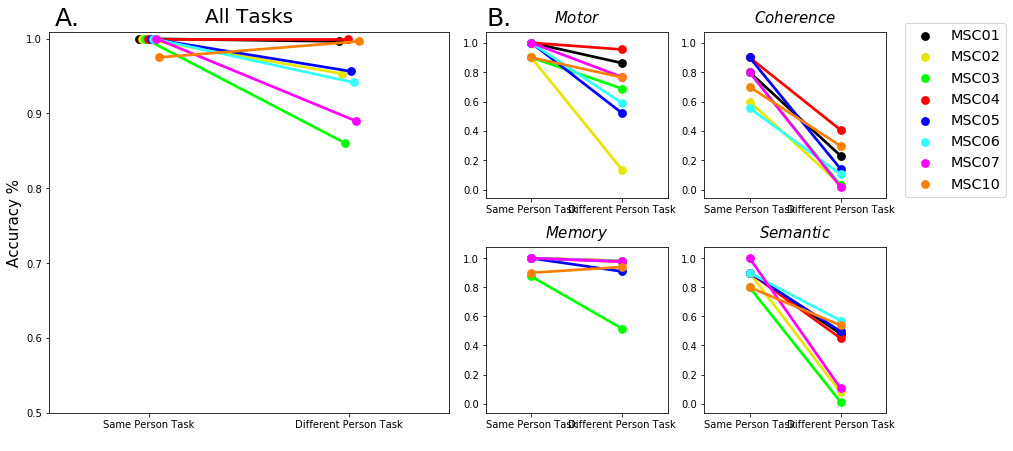

In [51]:
#reorganizing figure 1

#Same Task (Fig 1)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)

fig.text(.13, .893, 'A.',fontsize=25)
fig.text(.53, .893, 'B.',fontsize=25)
"""
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
#allres
ax0=fig.add_subplot(gs[0:,:2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ax=ax0,ci=None, data=allTask, dodge=.1,order=['Same Person Task','Different Person Task'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Tasks', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')

#motor
ax1=fig.add_subplot(gs[0,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DST[DST['task']=='motor'], ax=ax1, order=['Same Person Task','Different Person Task'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=15, pad=10)
plt.xlabel('')
plt.ylabel(' ')
#mixed
ax2=fig.add_subplot(gs[0,3],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DST[DST['task']=='glass'], ax=ax2, order=['Same Person Task','Different Person Task'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[1,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DST[DST['task']=='mem'],ax=ax3, order=['Same Person Task','Different Person Task'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=15, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')

ax4=fig.add_subplot(gs[1,3],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DST[DST['task']=='semantic'],ax=ax4, order=['Same Person Task','Different Person Task'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.legend(bbox_to_anchor=(1.7, 2.4),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')




plt.savefig(thisDir+'output/FigsFinal/taskSeperate_Plot.png', bbox_inches='tight')






In [64]:
allRest

,train,Analysis,acc
0,MSC01,Same Person Rest,1.000000
1,MSC02,Same Person Rest,0.975000
2,MSC03,Same Person Rest,0.937500
3,MSC04,Same Person Rest,0.975000
4,MSC05,Same Person Rest,0.975000
5,MSC06,Same Person Rest,0.944444
6,MSC07,Same Person Rest,0.972222
7,MSC10,Same Person Rest,0.950000
8,MSC01,Different Person Rest,0.151071
9,MSC02,Different Person Rest,0.752500


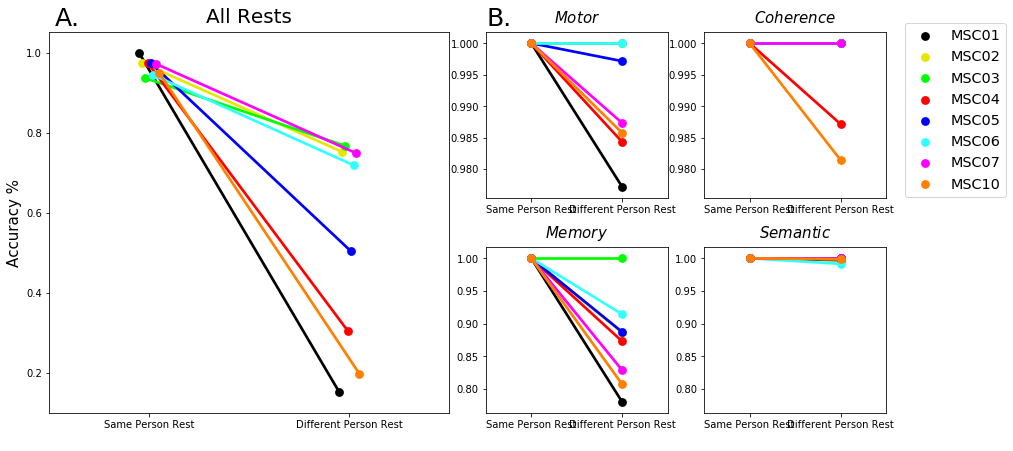

In [50]:
#reorganizing figure 1

#Same Rest (Fig 1)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)

fig.text(.13, .893, 'A.',fontsize=25)
fig.text(.53, .893, 'B.',fontsize=25)
"""
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
#allres
ax0=fig.add_subplot(gs[0:,:2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ax=ax0,ci=None, data=allRest, dodge=.1,order=['Same Person Rest','Different Person Rest'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Rests', fontsize=20, pad=10)
#y=[.5,.6,.7,.8,.9,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')

#motor
ax1=fig.add_subplot(gs[0,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DSR[DSR['task']=='motor'], ax=ax1, order=['Same Person Rest','Different Person Rest'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=15, pad=10)
plt.xlabel('')
plt.ylabel(' ')
#mixed
ax2=fig.add_subplot(gs[0,3],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DSR[DSR['task']=='glass'], ax=ax2, order=['Same Person Rest','Different Person Rest'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[1,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DSR[DSR['task']=='mem'],ax=ax3, order=['Same Person Rest','Different Person Rest'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=15, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')

ax4=fig.add_subplot(gs[1,3],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DSR[DSR['task']=='semantic'],ax=ax4, order=['Same Person Rest','Different Person Rest'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.legend(bbox_to_anchor=(1.7, 2.4),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')




plt.savefig(thisDir+'output/FigsFinal/restSeperate_Plot.png', bbox_inches='tight')






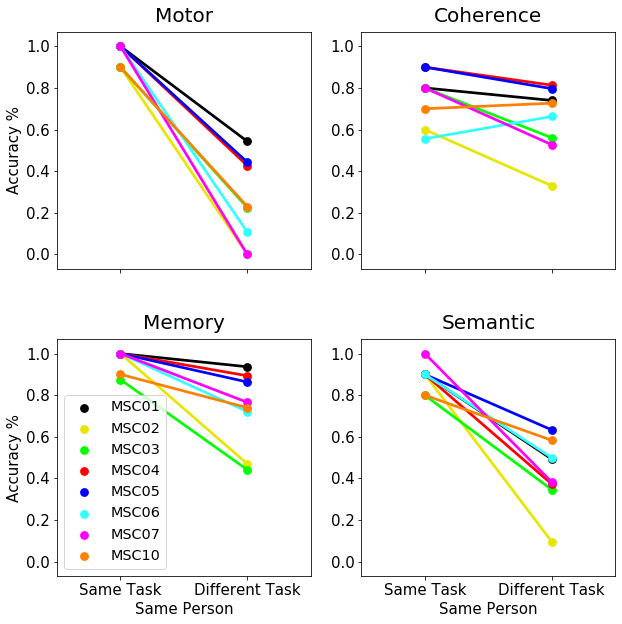

In [62]:

#Comparing same train same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task
#All Glass


ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=SST[SST['task']=='motor'], ax=ax1)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='')
plt.ylabel('Accuracy %',fontsize=15)

ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=SST[SST['task']=='glass'], ax=ax2)
ax.set_title('Coherence',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()

position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=SST[SST['task']=='mem'], ax=ax3)
ax.set_title('Memory',fontsize=20, pad=10)
plt.xlabel('Same Person',fontsize=15)
plt.ylabel('Accuracy %',fontsize=15)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.legend(loc='lower left',fontsize='x-large')
ax.tick_params(labelsize=15)

#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=SST[SST['task']=='semantic'],ax=ax4)
ax.set_title('Semantic',fontsize=20, pad=10)
plt.xlabel('Same Person', fontsize=15)
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()
ax.tick_params(labelsize=15)

plt.savefig(thisDir+'output/FigsFinal/TaskONLY_CVmSS_plots.png', bbox_inches='tight')



In [65]:
allRest

,train,Analysis,acc
0,MSC01,Same Person Rest,1.000000
1,MSC02,Same Person Rest,0.975000
2,MSC03,Same Person Rest,0.937500
3,MSC04,Same Person Rest,0.975000
4,MSC05,Same Person Rest,0.975000
5,MSC06,Same Person Rest,0.944444
6,MSC07,Same Person Rest,0.972222
7,MSC10,Same Person Rest,0.950000
8,MSC01,Different Person Rest,0.151071
9,MSC02,Different Person Rest,0.752500
